##### SARS-CoV-1

###### SARS-CoV-1 Average peak-normalized OD post-infection (3 mo.)

####### Input Data: Average peak-normalized ELIZA ODs for SARS-CoV-1 IgG antibody data from Li et al. 2006, 
####### "Long-Term Persistence of Robust Antibody and Cytotoxic T Cell Responses in 
####### Recovered Patients Infected with SARS Coronavirus", PLoS ONE.

####### days : 90, 180, 360, 540, 720
####### ODs : 0.95351472, 0.88161949, 0.71702398, 0.56000208, 0.51459265

##### 1. Import and get header data

In [285]:
import pandas as pd
import numpy
from datetime import datetime
import math

inputFile = "updated_OD_filev7_org.csv"

df2 = pd.read_csv(inputFile)

print(df2)

      Unnamed: 0     X      Date      Virus  OD_value     V4     V5        V6  \
0              1     1   8/20/85       229E  0.614941  False    NaN       NaN   
1              1     2  11/18/85       229E  0.870174  False   90.0  0.002836   
2              1     3   2/14/86       229E  0.709271  False   88.0 -0.001828   
3              1     4   5/29/86       229E  0.617718  False  104.0 -0.000880   
4              1     5    9/5/86       229E  0.698786  False   99.0  0.000819   
...          ...   ...       ...        ...       ...    ...    ...       ...   
3033          10  3034   2/21/86  SOSIP_HIV  0.854123  False   91.0 -0.001696   
3034          10  3035   5/23/86  SOSIP_HIV  0.805457  False   91.0 -0.000535   
3035          10  3036   8/11/86  SOSIP_HIV  0.909822  False   80.0  0.001305   
3036          10  3037  11/13/86  SOSIP_HIV  1.050687  False   94.0  0.001499   
3037          10  3038   2/24/87  SOSIP_HIV  0.981110    NaN  103.0 -0.000676   

            V8        V9  


In [286]:
headers = list(df2.head(0))
headers

['Unnamed: 0', 'X', 'Date', 'Virus', 'OD_value', 'V4', 'V5', 'V6', 'V8', 'V9']

In [287]:
##### Take dataset without headers

In [288]:
noheaderdataset0 = pd.read_csv(inputFile).iloc[0:]
noheaderdataset0

Unnamed: 0     X      Date      Virus  OD_value     V4     V5        V6  \
0              1     1   8/20/85       229E  0.614941  False    NaN       NaN   
1              1     2  11/18/85       229E  0.870174  False   90.0  0.002836   
2              1     3   2/14/86       229E  0.709271  False   88.0 -0.001828   
3              1     4   5/29/86       229E  0.617718  False  104.0 -0.000880   
4              1     5    9/5/86       229E  0.698786  False   99.0  0.000819   
...          ...   ...       ...        ...       ...    ...    ...       ...   
3033          10  3034   2/21/86  SOSIP_HIV  0.854123  False   91.0 -0.001696   
3034          10  3035   5/23/86  SOSIP_HIV  0.805457  False   91.0 -0.000535   
3035          10  3036   8/11/86  SOSIP_HIV  0.909822  False   80.0  0.001305   
3036          10  3037  11/13/86  SOSIP_HIV  1.050687  False   94.0  0.001499   
3037          10  3038   2/24/87  SOSIP_HIV  0.981110    NaN  103.0 -0.000676   

            V8        V9  
0     0.149344       NaN  
1     0.211330  0.000689  
2     0.172253 -0.000444  
3     0.150019 -0.000214  
4     0.169707  0.000199  
...        ...       ...  
3033  0.630368 -0.001252  
3034  0.594452 -0.000395  
3035  0.671476  0.000963  
3036  0.775439  0.001106  
3037  0.724089 -0.000499  

[3038 rows x 10 columns]

In [289]:
##### Remove Rowws only with NaN => "NA:"

In [290]:
noheaderdataset = noheaderdataset0.dropna(axis = 0, how ='all')
noheaderdataset

Unnamed: 0     X      Date      Virus  OD_value     V4     V5        V6  \
0              1     1   8/20/85       229E  0.614941  False    NaN       NaN   
1              1     2  11/18/85       229E  0.870174  False   90.0  0.002836   
2              1     3   2/14/86       229E  0.709271  False   88.0 -0.001828   
3              1     4   5/29/86       229E  0.617718  False  104.0 -0.000880   
4              1     5    9/5/86       229E  0.698786  False   99.0  0.000819   
...          ...   ...       ...        ...       ...    ...    ...       ...   
3033          10  3034   2/21/86  SOSIP_HIV  0.854123  False   91.0 -0.001696   
3034          10  3035   5/23/86  SOSIP_HIV  0.805457  False   91.0 -0.000535   
3035          10  3036   8/11/86  SOSIP_HIV  0.909822  False   80.0  0.001305   
3036          10  3037  11/13/86  SOSIP_HIV  1.050687  False   94.0  0.001499   
3037          10  3038   2/24/87  SOSIP_HIV  0.981110    NaN  103.0 -0.000676   

            V8        V9  
0     0.149344       NaN  
1     0.211330  0.000689  
2     0.172253 -0.000444  
3     0.150019 -0.000214  
4     0.169707  0.000199  
...        ...       ...  
3033  0.630368 -0.001252  
3034  0.594452 -0.000395  
3035  0.671476  0.000963  
3036  0.775439  0.001106  
3037  0.724089 -0.000499  

[3038 rows x 10 columns]

In [291]:
print(len(noheaderdataset))

3038


In [292]:
##### Take transpose of dataset

In [293]:
edridgefulldataset = numpy.transpose(noheaderdataset) 

edridgefulldataset 

0            1            2            3            4     \
Unnamed: 0         1            1            1            1            1   
X                  1            2            3            4            5   
Date         8/20/85     11/18/85      2/14/86      5/29/86       9/5/86   
Virus           229E         229E         229E         229E         229E   
OD_value    0.614941     0.870174     0.709271     0.617718     0.698786   
V4             False        False        False        False        False   
V5               NaN           90           88          104           99   
V6               NaN   0.00283593  -0.00182845 -0.000880309  0.000818863   
V8          0.149344      0.21133     0.172253     0.150019     0.169707   
V9               NaN  0.000688733 -0.000444057 -0.000213792  0.000198869   

                   5            6           7          8            9     ...  \
Unnamed: 0            1            1           1          1            1  ...   
X                     6            7           8          9           10  ...   
Date           11/26/86       3/4/87      6/1/87    8/20/87     11/19/87  ...   
Virus              229E         229E        229E       229E         229E  ...   
OD_value       0.762518     0.702607     1.97413    1.09826      1.00531  ...   
V4                False        False       False      False        False  ...   
V5                   82           98          89         80           91  ...   
V6          0.000777221 -0.000611339   0.0142867 -0.0109483  -0.00102139  ...   
V8             0.185185     0.170635    0.479436   0.266723      0.24415  ...   
V9          0.000188756  -0.00014847  0.00346967 -0.0026589 -0.000248054  ...   

                  3028       3029        3030         3031        3032  \
Unnamed: 0          10         10          10           10          10   
X                 3029       3030        3031         3032        3033   
Date           3/21/11    4/24/85     5/23/85      8/23/85    11/22/85   
Virus       SARS_CoV_2  SOSIP_HIV   SOSIP_HIV    SOSIP_HIV   SOSIP_HIV   
OD_value      0.861376    0.92522     1.30295      1.27482     1.00848   
V4                 NaN      False       False        False       False   
V5                 182        NaN          29           92          91   
V6             7.3e-05        NaN   0.0130252 -0.000305814 -0.00292672   
V8             0.64409   0.682841    0.961617     0.940853    0.744292   
V9            5.46e-05        NaN  0.00961298   -0.0002257    -0.00216   

                  3033         3034        3035        3036         3037  
Unnamed: 0          10           10          10          10           10  
X                 3034         3035        3036        3037         3038  
Date           2/21/86      5/23/86     8/11/86    11/13/86      2/24/87  
Virus        SOSIP_HIV    SOSIP_HIV   SOSIP_HIV   SOSIP_HIV    SOSIP_HIV  
OD_value      0.854123     0.805457    0.909822     1.05069      0.98111  
V4               False        False       False       False          NaN  
V5                  91           91          80          94          103  
V6         -0.00169628 -0.000534789  0.00130457  0.00149856 -0.000675504  
V8            0.630368     0.594452    0.671476    0.775439     0.724089  
V9         -0.00125191  -0.00039469  0.00096281  0.00110598 -0.000498542  

[10 rows x 3038 columns]

In [294]:
##### Get Length 

In [295]:
print(len(edridgefulldataset))

10


#####  229E
###### Input Data: ELIZA ODs for HCoV-229E N IgG antibodies converted to IgG antibodies from the supplementary 
###### dataset of Edridge et al. 2020, "Seasonal coronavirus protective immunity is short-lasting", Nature Medicine. 
###### using a linear regression model of N and IgG antibody data from Li et al. 2006, "Long-Term Persistence of 
###### Robust Antibody and Cytotoxic T Cell Responses in Recovered Patients Infected with SARS Coronavirus", PLoS ONE.

In [296]:
x229edata = df2[df2.isin(["229E"]).any(axis=1)]

In [297]:
x229edata.iloc[:1]

Unnamed: 0  X     Date Virus  OD_value     V4  V5  V6        V8  V9
0           1  1  8/20/85  229E  0.614941  False NaN NaN  0.149344 NaN

In [298]:
llx229elength = len(x229edata)

###### Note: Have to check Full Simplify

######## These values of a and b go into the the ancestral 
######## and descendent states analysis to estimate a and b for the zoonotic coronaviruses.

In [299]:
import math

def x229eprobinfgivenaod(aod):
    exponentValue = 5.248568 + (9.749887 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [300]:
x229probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    x229probinfgivenaodList.append(x229eprobinfgivenaod(currentValue))

print(x229probinfgivenaodList)

[0.004920048036205034, 0.0046305349546705765, 0.004357983240388405, 0.004101407725307196, 0.0038598794876948807, 0.0036325227527267234, 0.0034185119509150172, 0.0032170689278776783, 0.003027460299016794, 0.002848994942780972, 0.002681021626311956, 0.00252292675742194, 0.002374132257009232, 0.0022340935461931384, 0.002102297642631026, 0.0019782613606689724, 0.001861529610170043, 0.0017516737890590514, 0.0016482902648181487, 0.0015509989403623963, 0.0014594418999173602, 0.001373282130710893, 0.001292202316477827, 0.0012159036989585926, 0.0011441050037504432, 0.0010765414270424323, 0.0010129636799324309, 0.000953137087185962, 0.0008968407374523602, 0.0008438666821036925, 0.0007940191800058812, 0.000747113985669658, 0.0007029776783613526, 0.0006614470298801432, 0.0006223684088294021, 0.0005855972193253069, 0.0005509973721959806, 0.0005184407868294042, 0.000487806921928195, 0.00045898233352434874, 0.0004318602586973432, 0.0004063402235247394, 0.0003823276738758374, 0.00035973362773613385, 0

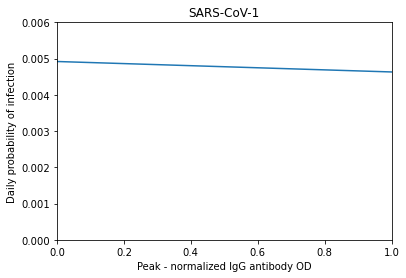

In [301]:
plt.plot(x229probinfgivenaodList)
plt.ylim(0,0.006)
plt.xlim(0.0, 1.0)
plt.xlabel("Peak - normalized IgG antibody OD")
plt.ylabel("Daily probability of infection")
plt.title('SARS-CoV-1')
plt.show()

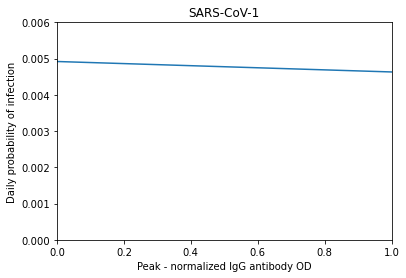

In [302]:
import matplotlib.pyplot as plt4

f2 = plt4.figure()
plt4.plot(sarscov1probinfgivenaodList)

plt4.ylim(0,0.006)
plt4.xlim(0.0, 1.0)
plt4.xlabel("Peak - normalized IgG antibody OD")
plt4.ylabel("Daily probability of infection")
plt4.title('SARS-CoV-1')
plt4.show()

f2.savefig("SARS-CoV-1_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [303]:
print(x229edata)

      Unnamed: 0     X      Date Virus  OD_value     V4     V5        V6  \
0              1     1   8/20/85  229E  0.614941  False    NaN       NaN   
1              1     2  11/18/85  229E  0.870174  False   90.0  0.002836   
2              1     3   2/14/86  229E  0.709271  False   88.0 -0.001828   
3              1     4   5/29/86  229E  0.617718  False  104.0 -0.000880   
4              1     5    9/5/86  229E  0.698786  False   99.0  0.000819   
...          ...   ...       ...   ...       ...    ...    ...       ...   
2780          10  2781    4/6/09  229E  0.649889  False  182.0  0.000359   
2781          10  2782   10/5/09  229E  0.562211   True  182.0 -0.000482   
2782          10  2783   3/29/10  229E  5.737067  False  175.0  0.029571   
2783          10  2784   9/20/10  229E  1.020412  False  175.0 -0.026952   
2784          10  2785   3/21/11  229E  0.873955    NaN  182.0 -0.000805   

            V8        V9  
0     0.149344       NaN  
1     0.211330  0.000689  
2     

In [304]:
import math

def nl63probinfgivenaod(aod):
    exponentValue = 5.248568 + (9.749887 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [305]:
x229edataArr = x229edata.to_numpy()

In [306]:
import statistics
import numpy as np

def grade_avg(num_list):
   
    grades = [float(num) for num in num_list]
   
    try:
        return statistics.mean(grades)
    except:
        return np.nan

In [307]:
import re

aod = 0
x229epaddedmeanwaning = dict();
llx229elength = len(x229edata)

index = 0

while aod <= 2.9:       
    index  = 2
    valueList = list()
    
    while index <= llx229elength:    
        #print("aod :" + str(aod))
        #print("index : " + str(index))
        print(x229edataArr[index-2])
        
        if ((x229edataArr[index-2][9] >= aod and aod >= x229edataArr[index-2][9]) or 
            (x229edataArr[index-2][9] <= aod and aod <= x229edataArr[index-2][9]) ) :
            if (x229edataArr[[index-1, 10]] != "NA" and re.match( r'^(F).*(E)$', x229edataArr[index-2][6] )):
                if x229edataArr[index-1][8].isnumeric() == True: 
                    valueList.append(x229edataArr[index-1][8])
                else:
                    valueList.append(0)
        average = grade_avg(valueList)
        print("average : " + str(average))
        x229epaddedmeanwaning["{0:.3f}".format(aod)] = average
        
        index = index + 1    
    aod = aod + 0.05


[1 1 '8/20/85' '229E' 0.614940589 False nan nan 0.149344324 nan]
average : nan
[1 2 '11/18/85' '229E' 0.870174098 False 90.0 0.0028359279999999997
 0.21133027199999999 0.0006887330000000001]
average : nan
[1 3 '2/14/86' '229E' 0.7092706459999999 False 88.0 -0.0018284479999999999
 0.172253299 -0.000444057]
average : nan
[1 4 '5/29/86' '229E' 0.617718497 False 104.0 -0.0008803089999999999
 0.150018966 -0.000213792]
average : nan
[1 5 '9/5/86' '229E' 0.6987859359999999 False 99.0 0.0008188630000000001
 0.16970698399999998 0.000198869]
average : nan
[1 6 '11/26/86' '229E' 0.762518067 False 82.0 0.000777221
 0.18518495399999998 0.000188756]
average : nan
[1 7 '3/4/87' '229E' 0.7026068940000001 False 98.0 -0.000611339
 0.170634941 -0.00014847]
average : nan
[1 8 '6/1/87' '229E' 1.974125176 False 89.0 0.014286722
 0.47943556600000004 0.00346967]
average : nan
[1 9 '8/20/87' '229E' 1.098260527 False 80.0 -0.010948308 0.266723288
 -0.002658903]
average : nan
[1 10 '11/19/87' '229E' 1.0053142529

average : nan
[3 658 '11/7/94' '229E' 0.9958879709999999 False 175.0
 -0.0007075089999999999 0.24186111300000002 -0.000171825]
average : nan
[3 659 '5/8/95' '229E' 1.039885845 False 182.0 0.000241747 0.252546426
 5.870000000000001e-05]
average : nan
[3 660 '11/6/95' '229E' 0.971814055 False 182.0 -0.000374021 0.236014528
 -9.08e-05]
average : nan
[3 661 '5/13/96' '229E' 1.0212247220000001 False 189.0
 0.00026143200000000003 0.24801439100000003 6.35e-05]
average : nan
[3 662 '11/4/96' '229E' 0.765468897 False 175.0 -0.0014614620000000002
 0.185901592 -0.00035493]
average : nan
[3 663 '6/25/03' '229E' 0.865239433 False 2424.0 4.1200000000000005e-05
 0.210131841 1e-05]
average : nan
[3 664 '1/13/04' '229E' 0.919393565 False 202.0 0.00026809 0.2232837
 6.51e-05]
average : nan
[3 665 '8/3/04' '229E' 0.8935770209999999 False 203.0 -0.000127175
 0.217013901 -3.09e-05]
average : nan
[3 666 '1/19/05' '229E' 0.7560046140000001 False 169.0 -0.000814038
 0.183603099 -0.00019769700000000001]
averag

 0.19693442600000002 7.77e-05]
average : nan
[1 24 '12/8/94' '229E' 1.054162315 False 182.0 0.001336619 0.256013606
 0.000324611]
average : nan
[1 25 '6/15/95' '229E' 0.7342739559999999 False 189.0
 -0.0016925310000000002 0.178325596 -0.000411048]
average : nan
[1 26 '12/11/95' '229E' 0.9858938629999999 False 179.0 0.001405698
 0.23943394699999998 0.00034138699999999996]
average : nan
[1 27 '6/10/96' '229E' 0.9372356009999999 False 182.0 -0.000267353
 0.227616813 -6.49e-05]
average : nan
[1 28 '12/2/96' '229E' 0.801006711 False 175.0 -0.0007784510000000001
 0.194532297 -0.00018905400000000002]
average : nan
[1 29 '4/28/03' '229E' 1.184296381 False 2338.0 0.00016393900000000002
 0.28761793399999996 3.98e-05]
average : nan
[1 30 '10/27/03' '229E' 1.040902798 False 182.0 -0.000787877 0.252793403
 -0.000191344]
average : nan
[1 31 '4/26/04' '229E' 0.869514386 False 182.0 -0.000941695 0.211170055
 -0.0002287]
average : nan
[1 32 '10/25/04' '229E' 1.060210754 False 182.0 0.001047782
 0.25748

average : nan
[2 332 '4/19/16' '229E' 1.3107219559999999 False 175.0 0.000913051
 0.318321619 0.000221743]
average : nan
[2 333 '10/18/16' '229E' 1.227997086 False 182.0 -0.00045453199999999995
 0.298231077 -0.00011038799999999999]
average : nan
[2 334 '4/25/17' '229E' 1.111945085 False 189.0 -0.0006140319999999999
 0.270046716 -0.000149124]
average : nan
[2 335 '10/31/17' '229E' 0.835072881 False 189.0 -0.0014649320000000002
 0.20280559899999998 -0.00035577300000000004]
average : nan
[2 336 '5/22/18' '229E' 0.93972573 False 203.0 0.000515531 0.228221565
 0.000125202]
average : nan
[2 337 '11/20/18' '229E' 0.8375357379999999 False 182.0 -0.000561483
 0.203403728 -0.000136362]
average : nan
[2 338 '5/16/19' '229E' 0.885665855 False 177.0 0.000271922 0.215092597
 6.6e-05]
average : nan
[2 339 '11/19/19' '229E' 0.869492791 nan 187.0 -8.65e-05 0.21116481
 -2.1e-05]
average : nan
[3 631 '1/31/85' '229E' 1.149688737 False nan nan 0.27921313 nan]
average : nan
[3 632 '5/2/85' '229E' 1.1618738

 -0.000126756]
average : nan
[9 2335 '8/10/88' '229E' 0.544747587 False 62.0 -0.000227697 0.132297268
 -5.5299999999999996e-05]
average : nan
[9 2336 '11/14/88' '229E' 0.656467293 True 96.0 0.001163747 0.159429489
 0.00028262700000000003]
average : nan
[9 2337 '5/30/89' '229E' 2.31979309 False 197.0 0.008443278 0.563384392
 0.0020505329999999998]
average : nan
[9 2338 '11/6/89' '229E' 1.136397876 False 160.0 -0.00739622 0.275985315
 -0.001796244]
average : nan
[9 2339 '5/14/90' '229E' 0.954802143 False 189.0 -0.000960824 0.231883019
 -0.000233345]
average : nan
[9 2340 '11/6/90' '229E' 0.7804089040000001 False 176.0
 -0.0009908710000000002 0.189529919 -0.000240643]
average : nan
[9 2341 '5/23/91' '229E' 0.775973283 False 198.0 -2.24e-05 0.188452685
 -5.44e-06]
average : nan
[9 2342 '11/4/91' '229E' 0.641994815 False 165.0 -0.0008119910000000001
 0.155914706 -0.0001972]
average : nan
[9 2343 '5/10/92' '229E' 0.705770103 False 188.0 0.00033923 0.171403158
 8.240000000000001e-05]
average 

average : nan
[9 2369 '4/4/11' '229E' 1.1728053809999999 False 182.0 0.001628441
 0.284827233 0.000395483]
average : nan
[9 2370 '9/29/11' '229E' 1.3531461669999998 False 178.0 0.00101315
 0.328624753 0.000246053]
average : nan
[9 2371 '4/16/12' '229E' 1.4322748680000001 False 200.0 0.000395644
 0.34784193 9.609999999999999e-05]
average : nan
[9 2372 '12/3/12' '229E' 1.291591338 False 231.0 -0.00060902 0.313675562
 -0.000147906]
average : nan
[9 2373 '6/3/13' '229E' 1.246107254 False 182.0 -0.000249913 0.302629308
 -6.07e-05]
average : nan
[9 2374 '12/16/13' '229E' 1.219475865 False 196.0 -0.000135874 0.296161615
 -3.3e-05]
average : nan
[9 2375 '6/16/14' '229E' 3.071739749 False 182.0 0.010177274 0.746001977
 0.00247165]
average : nan
[9 2376 '12/11/14' '229E' 2.21703581 False 178.0 -0.004801708
 0.5384287839999999 -0.001166142]
average : nan
[9 2377 '6/11/15' '229E' 2.030635041 False 182.0 -0.00102418
 0.49315953799999995 -0.000248732]
average : nan
[9 2378 '12/17/15' '229E' 1.436439

[2 324 '4/24/12' '229E' 1.2605728059999999 False 189.0 0.000369964
 0.306142409 8.98e-05]
average : nan
[2 325 '10/30/12' '229E' 1.1281709979999999 False 189.0
 -0.0007005389999999999 0.273987337 -0.000170133]
average : nan
[2 326 '4/22/13' '229E' 1.8185961480000001 False 174.0 0.003967961
 0.44166382299999996 0.000963658]
average : nan
[2 327 '10/28/13' '229E' 0.7984519809999999 False 189.0 -0.005397588
 0.19391185600000002 -0.0013108570000000001]
average : nan
[2 328 '4/29/14' '229E' 0.9217219659999999 False 183.0
 0.0006736060000000001 0.223849175 0.000163592]
average : nan
[2 329 '10/29/14' '229E' 0.781328681 True 183.0 -0.0007671760000000001
 0.18975329600000002 -0.00018631599999999998]
average : nan
[2 330 '4/22/15' '229E' 1.3549030869999998 False 175.0 0.003277568
 0.32905143800000003 0.000795989]
average : nan
[2 331 '10/27/15' '229E' 1.150938052 False 188.0 -0.00108492 0.279516539
 -0.00026348400000000003]
average : nan
[2 332 '4/19/16' '229E' 1.3107219559999999 False 175.0 0.

 0.322910817 -0.00019769700000000001]
average : nan
[6 1576 '11/16/87' '229E' 1.284290015 False 91.0 -0.000498115 0.311902364
 -0.000120972]
average : nan
[6 1577 '2/18/88' '229E' 1.326264024 False 94.0 0.00044653199999999997
 0.322096162 0.000108445]
average : nan
[6 1578 '5/26/88' '229E' 1.137940474 False 98.0 -0.001921669 0.27635995
 -0.000466696]
average : nan
[6 1579 '8/26/88' '229E' 1.369758656 False 92.0 0.002519763 0.332659258
 0.000611949]
average : nan
[6 1580 '11/28/88' '229E' 1.330324617 False 94.0 -0.00041951099999999996
 0.323082317 -0.00010188200000000001]
average : nan
[6 1581 '2/23/89' '229E' 1.1796485429999999 False 87.0 -0.001731909
 0.286489162 -0.000420611]
average : nan
[6 1582 '5/18/89' '229E' 1.172300914 False 84.0 -8.75e-05 0.284704718
 -2.12e-05]
average : nan
[6 1583 '8/8/89' '229E' 1.019219226 False 82.0 -0.00186685
 0.24752733600000001 -0.000453383]
average : nan
[6 1584 '11/7/89' '229E' 1.06652151 False 91.0 0.000519805 0.259015158
 0.00012624]
average : n

 0.000527579]
average : nan
[1 14 '12/14/88' '229E' 1.2153891000000001 False 77.0 3.1e-05 0.295169105
 7.52e-06]
average : nan
[1 15 '11/14/89' '229E' 1.0438397640000001 False 335.0
 -0.0005120880000000001 0.253506674 -0.000124365]
average : nan
[1 16 '6/11/90' '229E' 1.042954734 False 209.0 -4.23e-06 0.253291736
 -1.03e-06]
average : nan
[1 17 '12/17/90' '229E' 0.9126880270000001 False 189.0 -0.000689242
 0.221655195 -0.00016738900000000002]
average : nan
[1 18 '6/26/91' '229E' 0.846944099 False 191.0 -0.000344209 0.20568864
 -8.36e-05]
average : nan
[1 19 '12/20/91' '229E' 0.870990252 False 177.0 0.000135854
 0.21152848300000002 3.3e-05]
average : nan
[1 20 '12/11/92' '229E' 0.791353503 False 357.0 -0.000223072
 0.19218792199999998 -5.42e-05]
average : nan
[1 21 '6/11/93' '229E' 0.823409288 False 182.0 0.000176131 0.199972982
 4.28e-05]
average : nan
[1 22 '12/9/93' '229E' 0.752648985 False 181.0 -0.000390941
 0.18278815199999998 -9.49e-05]
average : nan
[1 23 '6/9/94' '229E' 0.81089

average : nan
[4 1008 '7/27/87' '229E' 1.068475088 False 95.0 -0.002336172 0.259489603
 -0.000567362]
average : nan
[4 1009 '10/26/87' '229E' 0.9376049040000001 True 91.0 -0.001438134
 0.227706502 -0.000349265]
average : nan
[4 1010 '1/20/88' '229E' 1.9144828 False 86.0 0.011359045
 0.46495083299999995 0.002758655]
average : nan
[4 1011 '4/20/88' '229E' 0.844190323 False 91.0 -0.011761456000000002
 0.205019859 -0.0028563840000000004]
average : nan
[4 1012 '7/27/88' '229E' 0.830951398 False 98.0 -0.000135091 0.201804657
 -3.28e-05]
average : nan
[4 1013 '10/25/88' '229E' 0.711458545 False 90.0 -0.001327698 0.172784651
 -0.000322445]
average : nan
[4 1014 '4/26/89' '229E' 0.751997198 False 183.0 0.000221523
 0.18262985899999998 5.379999999999999e-05]
average : nan
[4 1015 '10/25/89' '229E' 0.670082882 False 182.0 -0.00045007900000000004
 0.16273616800000001 -0.000109306]
average : nan
[4 1016 '4/25/90' '229E' 0.9012096559999999 True 182.0 0.001269927
 0.21886756 0.000308414]
average : na

 0.23693073399999998 -9.300000000000001e-05]
average : nan
[10 2749 '2/11/88' '229E' 0.967541933 False 79.0 -0.00010183200000000001
 0.23497700100000002 -2.47e-05]
average : nan
[10 2750 '5/19/88' '229E' 0.8814480659999999 False 98.0 -0.000878509
 0.214068265 -0.00021335400000000002]
average : nan
[10 2751 '8/18/88' '229E' 0.9548865040000001 False 91.0 0.000807016
 0.23190350699999998 0.000195992]
average : nan
[10 2752 '11/17/88' '229E' 1.05235323 False 91.0 0.0010710630000000001
 0.255574252 0.000260118]
average : nan
[10 2753 '5/29/89' '229E' 1.048610236 False 193.0 -1.9399999999999997e-05
 0.25466523 -4.71e-06]
average : nan
[10 2754 '11/27/89' '229E' 0.91223386 False 182.0 -0.0007493210000000001
 0.22154489600000002 -0.00018198]
average : nan
[10 2755 '5/21/90' '229E' 0.931685725 False 175.0 0.000111154 0.226268971
 2.7000000000000002e-05]
average : nan
[10 2756 '11/19/90' '229E' 0.8132153109999999 True 182.0 -0.000650936
 0.197497275 -0.000158086]
average : nan
[10 2757 '5/21/91'

average : nan
[4 1008 '7/27/87' '229E' 1.068475088 False 95.0 -0.002336172 0.259489603
 -0.000567362]
average : nan
[4 1009 '10/26/87' '229E' 0.9376049040000001 True 91.0 -0.001438134
 0.227706502 -0.000349265]
average : nan
[4 1010 '1/20/88' '229E' 1.9144828 False 86.0 0.011359045
 0.46495083299999995 0.002758655]
average : nan
[4 1011 '4/20/88' '229E' 0.844190323 False 91.0 -0.011761456000000002
 0.205019859 -0.0028563840000000004]
average : nan
[4 1012 '7/27/88' '229E' 0.830951398 False 98.0 -0.000135091 0.201804657
 -3.28e-05]
average : nan
[4 1013 '10/25/88' '229E' 0.711458545 False 90.0 -0.001327698 0.172784651
 -0.000322445]
average : nan
[4 1014 '4/26/89' '229E' 0.751997198 False 183.0 0.000221523
 0.18262985899999998 5.379999999999999e-05]
average : nan
[4 1015 '10/25/89' '229E' 0.670082882 False 182.0 -0.00045007900000000004
 0.16273616800000001 -0.000109306]
average : nan
[4 1016 '4/25/90' '229E' 0.9012096559999999 True 182.0 0.001269927
 0.21886756 0.000308414]
average : na

average : nan
[7 1857 '10/1/86' '229E' 0.906238973 True 91.0 -0.002333631 0.220088979
 -0.000566745]
average : nan
[7 1858 '1/7/87' '229E' 4.762152367 False 98.0 0.039346055 1.156535179
 0.009555573000000001]
average : nan
[7 1859 '3/25/87' '229E' 2.2737889119999997 False 77.0 -0.032316409
 0.552211829 -0.007848355]
average : nan
[7 1860 '7/1/87' '229E' 1.134110884 False 98.0 -0.011629368000000001
 0.275429897 -0.002824305]
average : nan
[7 1861 '9/30/87' '229E' 1.059326086 False 91.0 -0.0008218110000000001
 0.25726767899999997 -0.000199585]
average : nan
[7 1862 '1/6/88' '229E' 0.77191291 False 98.0 -0.002932788 0.187466584
 -0.0007122560000000001]
average : nan
[7 1863 '3/30/88' '229E' 1.115758646 False 84.0 0.004093402 0.270972877
 0.000994123]
average : nan
[7 1864 '6/29/88' '229E' 0.921186851 False 91.0 -0.002138152 0.223719217
 -0.000519271]
average : nan
[7 1865 '9/28/88' '229E' 0.8914363909999999 False 91.0 -0.000326928
 0.216494028 -7.94e-05]
average : nan
[7 1866 '1/3/89' '22

 0.221311521 -0.00037336199999999997]
average : nan
[3 640 '5/11/87' '229E' 0.942157583 False 89.0 0.000347019
 0.22881216399999998 8.43e-05]
average : nan
[3 641 '8/18/87' '229E' 0.914923657 False 99.0 -0.00027509 0.222198139
 -6.68e-05]
average : nan
[3 642 '11/4/87' '229E' 0.98378433 False 78.0 0.0008828289999999999
 0.23892162600000003 0.00021440400000000002]
average : nan
[3 643 '2/3/88' '229E' 0.8965457929999999 False 91.0 -0.000958665
 0.217734896 -0.00023282099999999997]
average : nan
[3 644 '5/4/88' '229E' 0.980460653 False 91.0 0.000922141
 0.23811443899999998 0.00022395099999999998]
average : nan
[3 645 '8/10/88' '229E' 0.950155856 False 98.0 -0.000309233
 0.23075462300000002 -7.509999999999998e-05]
average : nan
[3 646 '11/9/88' '229E' 0.9679720009999999 False 91.0 0.000195782
 0.235081447 4.7499999999999996e-05]
average : nan
[3 647 '5/10/89' '229E' 1.341942167 False 182.0 0.002054781 0.325903752
 0.000499024]
average : nan
[3 648 '11/9/89' '229E' 1.013423961 False 183.0 -

[8 2049 '12/15/89' '229E' 0.849419602 False 189.0 -0.000245296 0.20628984
 -5.96e-05]
average : nan
[8 2050 '6/15/90' '229E' 0.8694389790000001 True 182.0
 0.00010999700000000001 0.211151741 2.6700000000000002e-05]
average : nan
[8 2051 '12/10/90' '229E' 5.7908802029999995 False 178.0 0.027648546
 1.4063717740000001 0.006714719]
average : nan
[8 2052 '6/10/91' '229E' 1.4065897369999998 False 182.0 -0.024089508
 0.341604045 -0.0058503719999999995]
average : nan
[8 2053 '12/9/91' '229E' 1.210412537 False 182.0 -0.001077897 0.293960498
 -0.000261778]
average : nan
[8 2054 '6/10/92' '229E' 1.1672924359999999 False 184.0 -0.000234348
 0.28348836 -5.6899999999999994e-05]
average : nan
[8 2055 '12/21/92' '229E' 1.071600407 False 194.0 -0.000493258 0.260248617
 -0.00011979200000000001]
average : nan
[8 2056 '6/28/93' '229E' 1.008768795 False 189.0 -0.00033244199999999996
 0.244989347 -8.070000000000001e-05]
average : nan
[8 2057 '12/13/93' '229E' 0.911287752 False 168.0 -0.000580244
 0.2213151

 -5.5299999999999996e-05]
average : nan
[9 2336 '11/14/88' '229E' 0.656467293 True 96.0 0.001163747 0.159429489
 0.00028262700000000003]
average : nan
[9 2337 '5/30/89' '229E' 2.31979309 False 197.0 0.008443278 0.563384392
 0.0020505329999999998]
average : nan
[9 2338 '11/6/89' '229E' 1.136397876 False 160.0 -0.00739622 0.275985315
 -0.001796244]
average : nan
[9 2339 '5/14/90' '229E' 0.954802143 False 189.0 -0.000960824 0.231883019
 -0.000233345]
average : nan
[9 2340 '11/6/90' '229E' 0.7804089040000001 False 176.0
 -0.0009908710000000002 0.189529919 -0.000240643]
average : nan
[9 2341 '5/23/91' '229E' 0.775973283 False 198.0 -2.24e-05 0.188452685
 -5.44e-06]
average : nan
[9 2342 '11/4/91' '229E' 0.641994815 False 165.0 -0.0008119910000000001
 0.155914706 -0.0001972]
average : nan
[9 2343 '5/10/92' '229E' 0.705770103 False 188.0 0.00033923 0.171403158
 8.240000000000001e-05]
average : nan
[9 2344 '11/9/92' '229E' 0.653394394 True 183.0 -0.000286206 0.158683205
 -6.95e-05]
average : n

average : nan
[3 664 '1/13/04' '229E' 0.919393565 False 202.0 0.00026809 0.2232837
 6.51e-05]
average : nan
[3 665 '8/3/04' '229E' 0.8935770209999999 False 203.0 -0.000127175
 0.217013901 -3.09e-05]
average : nan
[3 666 '1/19/05' '229E' 0.7560046140000001 False 169.0 -0.000814038
 0.183603099 -0.00019769700000000001]
average : nan
[3 667 '7/26/05' '229E' 0.845374546 False 188.0 0.00047537199999999995
 0.205307459 0.000115449]
average : nan
[3 668 '2/9/06' '229E' 0.8320899690000001 False 198.0
 -6.709999999999999e-05 0.20208117 -1.63e-05]
average : nan
[3 669 '8/8/06' '229E' 0.7938378340000001 False 180.0
 -0.00021251200000000001 0.19279126600000002 -5.16e-05]
average : nan
[3 670 '2/20/07' '229E' 0.656621046 False 196.0 -0.000700086 0.159466829
 -0.000170023]
average : nan
[3 671 '8/29/07' '229E' 1.177465236 False 190.0 0.002741285 0.285958924
 0.0006657480000000001]
average : nan
[3 672 '2/20/08' '229E' 0.912319323 False 175.0 -0.00151512 0.221565651
 -0.00036796199999999994]
average 

average : nan
[1 1 '8/20/85' '229E' 0.614940589 False nan nan 0.149344324 nan]
average : nan
[1 2 '11/18/85' '229E' 0.870174098 False 90.0 0.0028359279999999997
 0.21133027199999999 0.0006887330000000001]
average : nan
[1 3 '2/14/86' '229E' 0.7092706459999999 False 88.0 -0.0018284479999999999
 0.172253299 -0.000444057]
average : nan
[1 4 '5/29/86' '229E' 0.617718497 False 104.0 -0.0008803089999999999
 0.150018966 -0.000213792]
average : nan
[1 5 '9/5/86' '229E' 0.6987859359999999 False 99.0 0.0008188630000000001
 0.16970698399999998 0.000198869]
average : nan
[1 6 '11/26/86' '229E' 0.762518067 False 82.0 0.000777221
 0.18518495399999998 0.000188756]
average : nan
[1 7 '3/4/87' '229E' 0.7026068940000001 False 98.0 -0.000611339
 0.170634941 -0.00014847]
average : nan
[1 8 '6/1/87' '229E' 1.974125176 False 89.0 0.014286722
 0.47943556600000004 0.00346967]
average : nan
[1 9 '8/20/87' '229E' 1.098260527 False 80.0 -0.010948308 0.266723288
 -0.002658903]
average : nan
[1 10 '11/19/87' '229E

average : nan
[1 21 '6/11/93' '229E' 0.823409288 False 182.0 0.000176131 0.199972982
 4.28e-05]
average : nan
[1 22 '12/9/93' '229E' 0.752648985 False 181.0 -0.000390941
 0.18278815199999998 -9.49e-05]
average : nan
[1 23 '6/9/94' '229E' 0.810897724 False 182.0 0.00032004799999999997
 0.19693442600000002 7.77e-05]
average : nan
[1 24 '12/8/94' '229E' 1.054162315 False 182.0 0.001336619 0.256013606
 0.000324611]
average : nan
[1 25 '6/15/95' '229E' 0.7342739559999999 False 189.0
 -0.0016925310000000002 0.178325596 -0.000411048]
average : nan
[1 26 '12/11/95' '229E' 0.9858938629999999 False 179.0 0.001405698
 0.23943394699999998 0.00034138699999999996]
average : nan
[1 27 '6/10/96' '229E' 0.9372356009999999 False 182.0 -0.000267353
 0.227616813 -6.49e-05]
average : nan
[1 28 '12/2/96' '229E' 0.801006711 False 175.0 -0.0007784510000000001
 0.194532297 -0.00018905400000000002]
average : nan
[1 29 '4/28/03' '229E' 1.184296381 False 2338.0 0.00016393900000000002
 0.28761793399999996 3.98e-05

average : nan
[6 1594 '5/20/92' '229E' 0.907775531 False 91.0 -0.000816 0.220462147
 -0.000198173]
average : nan
[6 1595 '8/20/92' '229E' 0.9291491909999999 False 92.0 0.000232322
 0.225652949 5.6399999999999995e-05]
average : nan
[6 1596 '11/18/92' '229E' 1.001354981 False 90.0 0.0008022869999999999
 0.24318883 0.000194843]
average : nan
[6 1597 '2/18/93' '229E' 0.841321509 False 92.0 -0.0017394939999999998
 0.204323139 -0.00042245300000000004]
average : nan
[6 1598 '6/3/93' '229E' 0.897324142 False 105.0 0.000533358 0.217923925
 0.000129531]
average : nan
[6 1599 '9/16/93' '229E' 0.8527905720000001 False 105.0
 -0.00042412900000000003 0.207108513 -0.00010300399999999999]
average : nan
[6 1600 '12/16/93' '229E' 0.81824063 False 91.0 -0.00037967 0.198717723
 -9.22e-05]
average : nan
[6 1601 '3/17/94' '229E' 0.839547123 False 91.0 0.000234137 0.203892212
 5.6899999999999994e-05]
average : nan
[6 1602 '6/27/94' '229E' 0.684156435 False 102.0 -0.0015234379999999998
 0.166154067 -0.0003699

average : nan
[8 2053 '12/9/91' '229E' 1.210412537 False 182.0 -0.001077897 0.293960498
 -0.000261778]
average : nan
[8 2054 '6/10/92' '229E' 1.1672924359999999 False 184.0 -0.000234348
 0.28348836 -5.6899999999999994e-05]
average : nan
[8 2055 '12/21/92' '229E' 1.071600407 False 194.0 -0.000493258 0.260248617
 -0.00011979200000000001]
average : nan
[8 2056 '6/28/93' '229E' 1.008768795 False 189.0 -0.00033244199999999996
 0.244989347 -8.070000000000001e-05]
average : nan
[8 2057 '12/13/93' '229E' 0.911287752 False 168.0 -0.000580244
 0.22131512399999997 -0.000140918]
average : nan
[8 2058 '7/18/94' '229E' 0.8594278559999999 False 217.0
 -0.00023898599999999998 0.208720443 -5.7999999999999994e-05]
average : nan
[8 2059 '1/16/95' '229E' 1.0004728999999999 False 182.0 0.000774973
 0.242974608 0.00018821]
average : nan
[8 2060 '7/17/95' '229E' 1.03540319 False 182.0 0.000191925 0.25145777
 4.66e-05]
average : nan
[8 2061 '1/19/96' '229E' 0.9801293459999999 True 186.0 -0.000297171
 0.238033

 0.176113418 -0.00024108900000000002]
average : nan
[5 1283 '11/6/85' '229E' 0.70038138 False 92.0 -0.000269388
 0.17009445399999998 -6.54e-05]
average : nan
[5 1284 '2/5/86' '229E' 0.716438535 False 91.0 0.000176452 0.17399409
 4.29e-05]
average : nan
[5 1285 '4/28/86' '229E' 1.14721437 False 82.0 0.005253364
 0.27861220600000003 0.001275831]
average : nan
[5 1286 '7/31/86' '229E' 0.889722558 False 94.0 -0.002739275
 0.21607780699999998 -0.00066526]
average : nan
[5 1287 '10/30/86' '229E' 0.812808495 False 91.0 -0.000845209
 0.19739847600000002 -0.000205267]
average : nan
[5 1288 '2/3/87' '229E' 0.856380384 False 96.0 0.000453874 0.207980334
 0.00011022799999999999]
average : nan
[5 1289 '5/7/87' '229E' 0.9481855790000001 False 93.0 0.000987153
 0.230276122 0.00023974]
average : nan
[5 1290 '8/6/87' '229E' 0.753112839 False 91.0 -0.002143656 0.182900803
 -0.000520608]
average : nan
[5 1291 '11/2/87' '229E' 0.753493518 False 88.0 4.33e-06 0.182993255
 1.05e-06]
average : nan
[5 1292 '2

[8 2072 '9/24/07' '229E' 0.780157008 False 182.0 -1.61e-06 0.189468743
 -3.91e-07]
average : nan
[8 2073 '4/21/08' '229E' 0.7905702370000001 False 210.0 4.96e-05
 0.191997698 1.2e-05]
average : nan
[8 2074 '10/13/08' '229E' 0.6974735120000001 False 175.0 -0.000531981
 0.169388249 -0.000129197]
average : nan
[8 2075 '4/6/09' '229E' 0.837875285 True 175.0 0.0008022960000000001
 0.20348619 0.000194845]
average : nan
[8 2076 '10/5/09' '229E' 1.216736787 False 182.0 0.002081657 0.295496404
 0.000505551]
average : nan
[8 2077 '6/7/10' '229E' 1.027425604 False 245.0 -0.000772699 0.249520335
 -0.000187657]
average : nan
[8 2078 '12/13/10' '229E' 0.981635583 False 189.0 -0.000242275 0.238399782
 -5.88e-05]
average : nan
[8 2079 '5/9/11' '229E' 0.86475342 False 147.0 -0.000795117 0.210013808
 -0.000193102]
average : nan
[8 2080 '11/7/11' '229E' 0.713813556 False 182.0 -0.00082934
 0.17335658899999998 -0.000201413]
average : nan
[8 2081 '7/9/12' '229E' 0.731359784 False 245.0 7.159999999999999e-0

average : nan
[4 1012 '7/27/88' '229E' 0.830951398 False 98.0 -0.000135091 0.201804657
 -3.28e-05]
average : nan
[4 1013 '10/25/88' '229E' 0.711458545 False 90.0 -0.001327698 0.172784651
 -0.000322445]
average : nan
[4 1014 '4/26/89' '229E' 0.751997198 False 183.0 0.000221523
 0.18262985899999998 5.379999999999999e-05]
average : nan
[4 1015 '10/25/89' '229E' 0.670082882 False 182.0 -0.00045007900000000004
 0.16273616800000001 -0.000109306]
average : nan
[4 1016 '4/25/90' '229E' 0.9012096559999999 True 182.0 0.001269927
 0.21886756 0.000308414]
average : nan
[4 1017 '10/19/90' '229E' 1.433815808 True 177.0 0.003009074
 0.34821616200000005 0.000730783]
average : nan
[4 1018 '4/24/91' '229E' 2.038715658 False 187.0 0.0032347590000000002
 0.495121995 0.000785593]
average : nan
[4 1019 '10/30/91' '229E' 0.880785615 False 189.0 -0.006126614 0.213907383
 -0.0014879079999999998]
average : nan
[4 1020 '4/28/92' '229E' 0.8045406270000001 False 181.0 -0.000421243
 0.195390543 -0.00010230299999999

 -0.000170234]
average : nan
[6 1607 '10/10/95' '229E' 0.704563678 False 91.0 0.000685211 0.171110165
 0.00016641]
average : nan
[6 1608 '1/11/96' '229E' 0.665561453 False 93.0 -0.000419379 0.161638094
 -0.00010185]
average : nan
[6 1609 '4/15/96' '229E' 0.644131645 False 95.0 -0.000225577 0.156433656
 -5.479999999999999e-05]
average : nan
[6 1610 '8/5/96' '229E' 0.634673443 False 112.0 -8.44e-05 0.15413664
 -2.05e-05]
average : nan
[6 1611 '11/5/96' '229E' 0.6887077429999999 False 92.0 0.000587329
 0.167259397 0.000142639]
average : nan
[6 1612 '2/11/97' '229E' 0.734225389 nan 98.0 0.00046446599999999997
 0.17831380100000002 0.00011279999999999999]
average : nan
[7 1852 '6/26/85' '229E' 0.894819678 False nan nan 0.217315692 nan]
average : nan
[7 1853 '9/25/85' '229E' 1.03477641 False 91.0 0.001537986 0.25130555
 0.000373515]
average : nan
[7 1854 '12/18/85' '229E' 0.934536513 False 84.0 -0.001193332 0.226961313
 -0.000289812]
average : nan
[7 1855 '3/26/86' '229E' 1.2101779240000001 F

average : nan
[9 2348 '11/29/94' '229E' 0.9824647559999999 False 189.0
 -0.0014418010000000002 0.23860115399999998 -0.000350155]
average : nan
[9 2349 '5/30/95' '229E' 0.6788789959999999 False 182.0 -0.001668054
 0.16487239 -0.00040510300000000003]
average : nan
[9 2350 '12/4/95' '229E' 0.7233422840000001 False 188.0 0.000236507
 0.175670733 5.739999999999999e-05]
average : nan
[9 2351 '5/30/96' '229E' 0.63658915 False 178.0 -0.000487377
 0.15460188800000002 -0.000118364]
average : nan
[9 2352 '12/3/96' '229E' 0.737817526 False 187.0 0.000541328 0.179186187
 0.00013146700000000002]
average : nan
[9 2353 '4/10/03' '229E' 0.516364292 False 2319.0 -9.549999999999999e-05
 0.12540410800000001 -2.3199999999999998e-05]
average : nan
[9 2354 '10/13/03' '229E' 0.501978449 False 186.0 -7.730000000000001e-05
 0.121910365 -1.88e-05]
average : nan
[9 2355 '4/13/04' '229E' 0.560263954 False 183.0 0.0003185 0.136065569
 7.74e-05]
average : nan
[9 2356 '10/12/04' '229E' 0.653187277 False 182.0 0.00051

[3 663 '6/25/03' '229E' 0.865239433 False 2424.0 4.1200000000000005e-05
 0.210131841 1e-05]
average : nan
[3 664 '1/13/04' '229E' 0.919393565 False 202.0 0.00026809 0.2232837
 6.51e-05]
average : nan
[3 665 '8/3/04' '229E' 0.8935770209999999 False 203.0 -0.000127175
 0.217013901 -3.09e-05]
average : nan
[3 666 '1/19/05' '229E' 0.7560046140000001 False 169.0 -0.000814038
 0.183603099 -0.00019769700000000001]
average : nan
[3 667 '7/26/05' '229E' 0.845374546 False 188.0 0.00047537199999999995
 0.205307459 0.000115449]
average : nan
[3 668 '2/9/06' '229E' 0.8320899690000001 False 198.0
 -6.709999999999999e-05 0.20208117 -1.63e-05]
average : nan
[3 669 '8/8/06' '229E' 0.7938378340000001 False 180.0
 -0.00021251200000000001 0.19279126600000002 -5.16e-05]
average : nan
[3 670 '2/20/07' '229E' 0.656621046 False 196.0 -0.000700086 0.159466829
 -0.000170023]
average : nan
[3 671 '8/29/07' '229E' 1.177465236 False 190.0 0.002741285 0.285958924
 0.0006657480000000001]
average : nan
[3 672 '2/20/0

average : nan
[9 2338 '11/6/89' '229E' 1.136397876 False 160.0 -0.00739622 0.275985315
 -0.001796244]
average : nan
[9 2339 '5/14/90' '229E' 0.954802143 False 189.0 -0.000960824 0.231883019
 -0.000233345]
average : nan
[9 2340 '11/6/90' '229E' 0.7804089040000001 False 176.0
 -0.0009908710000000002 0.189529919 -0.000240643]
average : nan
[9 2341 '5/23/91' '229E' 0.775973283 False 198.0 -2.24e-05 0.188452685
 -5.44e-06]
average : nan
[9 2342 '11/4/91' '229E' 0.641994815 False 165.0 -0.0008119910000000001
 0.155914706 -0.0001972]
average : nan
[9 2343 '5/10/92' '229E' 0.705770103 False 188.0 0.00033923 0.171403158
 8.240000000000001e-05]
average : nan
[9 2344 '11/9/92' '229E' 0.653394394 True 183.0 -0.000286206 0.158683205
 -6.95e-05]
average : nan
[9 2345 '5/11/93' '229E' 2.534006565 False 183.0 0.010276569000000001
 0.615408225 0.002495765]
average : nan
[9 2346 '11/22/93' '229E' 1.471231084 False 195.0 -0.0054501309999999996
 0.35730282700000005 -0.001323617]
average : nan
[9 2347 '5/2

[1 8 '6/1/87' '229E' 1.974125176 False 89.0 0.014286722
 0.47943556600000004 0.00346967]
average : nan
[1 9 '8/20/87' '229E' 1.098260527 False 80.0 -0.010948308 0.266723288
 -0.002658903]
average : nan
[1 10 '11/19/87' '229E' 1.0053142529999999 False 91.0 -0.001021388
 0.244150378 -0.000248054]
average : nan
[1 11 '2/25/88' '229E' 0.903371239 False 98.0 -0.001040235
 0.21939252199999998 -0.00025263099999999996]
average : nan
[1 12 '5/19/88' '229E' 0.926252781 False 84.0 0.000272399 0.224949528
 6.620000000000001e-05]
average : nan
[1 13 '9/28/88' '229E' 1.213004536 False 132.0 0.002172362 0.29458999
 0.000527579]
average : nan
[1 14 '12/14/88' '229E' 1.2153891000000001 False 77.0 3.1e-05 0.295169105
 7.52e-06]
average : nan
[1 15 '11/14/89' '229E' 1.0438397640000001 False 335.0
 -0.0005120880000000001 0.253506674 -0.000124365]
average : nan
[1 16 '6/11/90' '229E' 1.042954734 False 209.0 -4.23e-06 0.253291736
 -1.03e-06]
average : nan
[1 17 '12/17/90' '229E' 0.9126880270000001 False 189

[2 326 '4/22/13' '229E' 1.8185961480000001 False 174.0 0.003967961
 0.44166382299999996 0.000963658]
average : nan
[2 327 '10/28/13' '229E' 0.7984519809999999 False 189.0 -0.005397588
 0.19391185600000002 -0.0013108570000000001]
average : nan
[2 328 '4/29/14' '229E' 0.9217219659999999 False 183.0
 0.0006736060000000001 0.223849175 0.000163592]
average : nan
[2 329 '10/29/14' '229E' 0.781328681 True 183.0 -0.0007671760000000001
 0.18975329600000002 -0.00018631599999999998]
average : nan
[2 330 '4/22/15' '229E' 1.3549030869999998 False 175.0 0.003277568
 0.32905143800000003 0.000795989]
average : nan
[2 331 '10/27/15' '229E' 1.150938052 False 188.0 -0.00108492 0.279516539
 -0.00026348400000000003]
average : nan
[2 332 '4/19/16' '229E' 1.3107219559999999 False 175.0 0.000913051
 0.318321619 0.000221743]
average : nan
[2 333 '10/18/16' '229E' 1.227997086 False 182.0 -0.00045453199999999995
 0.298231077 -0.00011038799999999999]
average : nan
[2 334 '4/25/17' '229E' 1.111945085 False 189.0 -

[8 2055 '12/21/92' '229E' 1.071600407 False 194.0 -0.000493258 0.260248617
 -0.00011979200000000001]
average : nan
[8 2056 '6/28/93' '229E' 1.008768795 False 189.0 -0.00033244199999999996
 0.244989347 -8.070000000000001e-05]
average : nan
[8 2057 '12/13/93' '229E' 0.911287752 False 168.0 -0.000580244
 0.22131512399999997 -0.000140918]
average : nan
[8 2058 '7/18/94' '229E' 0.8594278559999999 False 217.0
 -0.00023898599999999998 0.208720443 -5.7999999999999994e-05]
average : nan
[8 2059 '1/16/95' '229E' 1.0004728999999999 False 182.0 0.000774973
 0.242974608 0.00018821]
average : nan
[8 2060 '7/17/95' '229E' 1.03540319 False 182.0 0.000191925 0.25145777
 4.66e-05]
average : nan
[8 2061 '1/19/96' '229E' 0.9801293459999999 True 186.0 -0.000297171
 0.23803397699999998 -7.219999999999999e-05]
average : nan
[8 2062 '7/9/96' '229E' 1.7967068819999998 False 172.0 0.004747544
 0.43634780100000004 0.001152987]
average : nan
[8 2063 '12/16/96' '229E' 1.213534451 False 160.0 -0.0036448279999999997

average : nan
[2 324 '4/24/12' '229E' 1.2605728059999999 False 189.0 0.000369964
 0.306142409 8.98e-05]
average : nan
[2 325 '10/30/12' '229E' 1.1281709979999999 False 189.0
 -0.0007005389999999999 0.273987337 -0.000170133]
average : nan
[2 326 '4/22/13' '229E' 1.8185961480000001 False 174.0 0.003967961
 0.44166382299999996 0.000963658]
average : nan
[2 327 '10/28/13' '229E' 0.7984519809999999 False 189.0 -0.005397588
 0.19391185600000002 -0.0013108570000000001]
average : nan
[2 328 '4/29/14' '229E' 0.9217219659999999 False 183.0
 0.0006736060000000001 0.223849175 0.000163592]
average : nan
[2 329 '10/29/14' '229E' 0.781328681 True 183.0 -0.0007671760000000001
 0.18975329600000002 -0.00018631599999999998]
average : nan
[2 330 '4/22/15' '229E' 1.3549030869999998 False 175.0 0.003277568
 0.32905143800000003 0.000795989]
average : nan
[2 331 '10/27/15' '229E' 1.150938052 False 188.0 -0.00108492 0.279516539
 -0.00026348400000000003]
average : nan
[2 332 '4/19/16' '229E' 1.3107219559999999 

average : nan
[7 1864 '6/29/88' '229E' 0.921186851 False 91.0 -0.002138152 0.223719217
 -0.000519271]
average : nan
[7 1865 '9/28/88' '229E' 0.8914363909999999 False 91.0 -0.000326928
 0.216494028 -7.94e-05]
average : nan
[7 1866 '1/3/89' '229E' 0.895877646 True 97.0 4.5799999999999995e-05
 0.21757263 1.11e-05]
average : nan
[7 1867 '7/3/89' '229E' 1.354234559 False 181.0 0.002532359 0.328889079
 0.000615008]
average : nan
[7 1868 '6/20/90' '229E' 0.868475135 False 352.0 -0.001379998 0.210917663
 -0.000335146]
average : nan
[7 1869 '12/20/90' '229E' 0.996593023 False 183.0 0.000700098
 0.24203234199999998 0.000170026]
average : nan
[7 1870 '6/13/91' '229E' 0.8125784979999999 False 175.0
 -0.0010515119999999999 0.197342619 -0.00025537]
average : nan
[7 1871 '12/16/91' '229E' 1.092760781 False 186.0 0.0015063560000000001
 0.265387621 0.00036583300000000003]
average : nan
[7 1872 '7/2/92' '229E' 0.7678955340000001 False 199.0 -0.001632489
 0.186490925 -0.000396466]
average : nan
[7 1873 '

 0.244989347 -8.070000000000001e-05]
average : nan
[8 2057 '12/13/93' '229E' 0.911287752 False 168.0 -0.000580244
 0.22131512399999997 -0.000140918]
average : nan
[8 2058 '7/18/94' '229E' 0.8594278559999999 False 217.0
 -0.00023898599999999998 0.208720443 -5.7999999999999994e-05]
average : nan
[8 2059 '1/16/95' '229E' 1.0004728999999999 False 182.0 0.000774973
 0.242974608 0.00018821]
average : nan
[8 2060 '7/17/95' '229E' 1.03540319 False 182.0 0.000191925 0.25145777
 4.66e-05]
average : nan
[8 2061 '1/19/96' '229E' 0.9801293459999999 True 186.0 -0.000297171
 0.23803397699999998 -7.219999999999999e-05]
average : nan
[8 2062 '7/9/96' '229E' 1.7967068819999998 False 172.0 0.004747544
 0.43634780100000004 0.001152987]
average : nan
[8 2063 '12/16/96' '229E' 1.213534451 False 160.0 -0.0036448279999999997
 0.294718685 -0.000885182]
average : nan
[8 2064 '4/7/03' '229E' 0.7548367009999999 False 2303.0
 -0.00019917400000000001 0.18331946 -4.84e-05]
average : nan
[8 2065 '10/13/03' '229E' 0.7

 0.253123195 0.00018140900000000002]
average : nan
[3 695 '1/14/20' '229E' 1.298567972 nan 182.0 0.0014082810000000002
 0.31536990600000003 0.000342015]
average : nan
[4 998 '1/31/85' '229E' 0.640654368 False nan nan 0.155589166 nan]
average : nan
[4 999 '5/8/85' '229E' 0.613719632 False 97.0 -0.000277678
 0.14904780199999998 -6.74e-05]
average : nan
[4 1000 '8/9/85' '229E' 0.563168906 False 93.0 -0.0005435559999999999
 0.136771065 -0.000132008]
average : nan
[4 1001 '11/13/85' '229E' 0.545519771 True 96.0 -0.000183845
 0.13248479999999999 -4.46e-05]
average : nan
[4 1002 '2/13/86' '229E' 1.21185402 False 92.0 0.0072427640000000005
 0.294310576 0.001758976]
average : nan
[4 1003 '5/15/86' '229E' 0.629368055 False 91.0 -0.006400945 0.152848175
 -0.0015545320000000002]
average : nan
[4 1004 '9/5/86' '229E' 0.464851213 False 113.0 -0.0014559010000000001
 0.11289365400000001 -0.00035358]
average : nan
[4 1005 '11/17/86' '229E' 0.459475872 True 73.0 -7.36e-05
 0.11158820000000001 -1.7899999

average : nan
[5 1316 '10/20/04' '229E' 0.7338261620000001 False 183.0 -0.000728652
 0.178216845 -0.00017696]
average : nan
[5 1317 '4/19/05' '229E' 2.8425734410000003 False 181.0
 0.011650536999999999 0.690346703 0.002829447]
average : nan
[5 1318 '10/26/05' '229E' 1.361397365 False 190.0 -0.007795664 0.330628637
 -0.001893253]
average : nan
[5 1319 '4/24/06' '229E' 1.10519127 False 180.0 -0.001423367 0.268406486
 -0.000345679]
average : nan
[5 1320 '10/23/06' '229E' 1.221952556 False 182.0 0.000641546 0.296763104
 0.000155806]
average : nan
[5 1321 '4/25/07' '229E' 1.06961505 False 184.0 -0.000827921 0.259766454
 -0.000201069]
average : nan
[5 1322 '10/23/07' '229E' 1.140936889 False 181.0 0.000394043 0.277087659
 9.570000000000001e-05]
average : nan
[5 1323 '4/24/08' '229E' 0.8671340790000001 False 184.0 -0.001488059
 0.210591974 -0.00036139]
average : nan
[5 1324 '10/21/08' '229E' 0.779924614 False 180.0 -0.00048449699999999997
 0.18941230399999998 -0.000117665]
average : nan
[5 13

 0.17831380100000002 0.00011279999999999999]
average : nan
[7 1852 '6/26/85' '229E' 0.894819678 False nan nan 0.217315692 nan]
average : nan
[7 1853 '9/25/85' '229E' 1.03477641 False 91.0 0.001537986 0.25130555
 0.000373515]
average : nan
[7 1854 '12/18/85' '229E' 0.934536513 False 84.0 -0.001193332 0.226961313
 -0.000289812]
average : nan
[7 1855 '3/26/86' '229E' 1.2101779240000001 False 98.0 0.002812667
 0.29390352 0.0006830839999999999]
average : nan
[7 1856 '7/2/86' '229E' 1.118599397 False 98.0 -0.000934475 0.271662781
 -0.00022694599999999998]
average : nan
[7 1857 '10/1/86' '229E' 0.906238973 True 91.0 -0.002333631 0.220088979
 -0.000566745]
average : nan
[7 1858 '1/7/87' '229E' 4.762152367 False 98.0 0.039346055 1.156535179
 0.009555573000000001]
average : nan
[7 1859 '3/25/87' '229E' 2.2737889119999997 False 77.0 -0.032316409
 0.552211829 -0.007848355]
average : nan
[7 1860 '7/1/87' '229E' 1.134110884 False 98.0 -0.011629368000000001
 0.275429897 -0.002824305]
average : nan
[7

average : nan
[10 2773 '4/12/05' '229E' 0.7549100809999999 False 169.0
 -6.890000000000001e-05 0.18333728100000002 -1.67e-05]
average : nan
[10 2774 '10/10/05' '229E' 0.6212036439999999 False 181.0 -0.00073871
 0.150865368 -0.000179403]
average : nan
[10 2775 '4/10/06' '229E' 0.674670985 False 182.0 0.000293777
 0.16385043300000002 7.13e-05]
average : nan
[10 2776 '10/9/06' '229E' 0.645061451 True 182.0 -0.00016269 0.156659469
 -3.9500000000000005e-05]
average : nan
[10 2777 '4/10/07' '229E' 1.074897484 False 183.0 0.002348831 0.261049345
 0.000570436]
average : nan
[10 2778 '10/8/07' '229E' 0.7567850340000001 False 181.0 -0.001757527
 0.183792631 -0.00042683300000000005]
average : nan
[10 2779 '4/7/08' '229E' 0.665260176 False 182.0 -0.000502884 0.161564926
 -0.00012213]
average : nan
[10 2780 '10/6/08' '229E' 0.584562378 False 182.0 -0.000443394 0.141966679
 -0.00010768299999999999]
average : nan
[10 2781 '4/6/09' '229E' 0.6498889379999999 False 182.0 0.000358937
 0.15783187099999998

 0.000145564]
average : nan
[3 693 '1/7/19' '229E' 0.900336557 False 223.0 -0.001150952 0.21865552
 -0.00027952]
average : nan
[3 694 '7/16/19' '229E' 1.042260749 False 190.0 0.0007469689999999999
 0.253123195 0.00018140900000000002]
average : nan
[3 695 '1/14/20' '229E' 1.298567972 nan 182.0 0.0014082810000000002
 0.31536990600000003 0.000342015]
average : nan
[4 998 '1/31/85' '229E' 0.640654368 False nan nan 0.155589166 nan]
average : nan
[4 999 '5/8/85' '229E' 0.613719632 False 97.0 -0.000277678
 0.14904780199999998 -6.74e-05]
average : nan
[4 1000 '8/9/85' '229E' 0.563168906 False 93.0 -0.0005435559999999999
 0.136771065 -0.000132008]
average : nan
[4 1001 '11/13/85' '229E' 0.545519771 True 96.0 -0.000183845
 0.13248479999999999 -4.46e-05]
average : nan
[4 1002 '2/13/86' '229E' 1.21185402 False 92.0 0.0072427640000000005
 0.294310576 0.001758976]
average : nan
[4 1003 '5/15/86' '229E' 0.629368055 False 91.0 -0.006400945 0.152848175
 -0.0015545320000000002]
average : nan
[4 1004 '9/

[9 2334 '6/9/88' '229E' 0.55886479 False 121.0 -0.000521933 0.135725769
 -0.000126756]
average : nan
[9 2335 '8/10/88' '229E' 0.544747587 False 62.0 -0.000227697 0.132297268
 -5.5299999999999996e-05]
average : nan
[9 2336 '11/14/88' '229E' 0.656467293 True 96.0 0.001163747 0.159429489
 0.00028262700000000003]
average : nan
[9 2337 '5/30/89' '229E' 2.31979309 False 197.0 0.008443278 0.563384392
 0.0020505329999999998]
average : nan
[9 2338 '11/6/89' '229E' 1.136397876 False 160.0 -0.00739622 0.275985315
 -0.001796244]
average : nan
[9 2339 '5/14/90' '229E' 0.954802143 False 189.0 -0.000960824 0.231883019
 -0.000233345]
average : nan
[9 2340 '11/6/90' '229E' 0.7804089040000001 False 176.0
 -0.0009908710000000002 0.189529919 -0.000240643]
average : nan
[9 2341 '5/23/91' '229E' 0.775973283 False 198.0 -2.24e-05 0.188452685
 -5.44e-06]
average : nan
[9 2342 '11/4/91' '229E' 0.641994815 False 165.0 -0.0008119910000000001
 0.155914706 -0.0001972]
average : nan
[9 2343 '5/10/92' '229E' 0.70577

 -0.00026348400000000003]
average : nan
[2 332 '4/19/16' '229E' 1.3107219559999999 False 175.0 0.000913051
 0.318321619 0.000221743]
average : nan
[2 333 '10/18/16' '229E' 1.227997086 False 182.0 -0.00045453199999999995
 0.298231077 -0.00011038799999999999]
average : nan
[2 334 '4/25/17' '229E' 1.111945085 False 189.0 -0.0006140319999999999
 0.270046716 -0.000149124]
average : nan
[2 335 '10/31/17' '229E' 0.835072881 False 189.0 -0.0014649320000000002
 0.20280559899999998 -0.00035577300000000004]
average : nan
[2 336 '5/22/18' '229E' 0.93972573 False 203.0 0.000515531 0.228221565
 0.000125202]
average : nan
[2 337 '11/20/18' '229E' 0.8375357379999999 False 182.0 -0.000561483
 0.203403728 -0.000136362]
average : nan
[2 338 '5/16/19' '229E' 0.885665855 False 177.0 0.000271922 0.215092597
 6.6e-05]
average : nan
[2 339 '11/19/19' '229E' 0.869492791 nan 187.0 -8.65e-05 0.21116481
 -2.1e-05]
average : nan
[3 631 '1/31/85' '229E' 1.149688737 False nan nan 0.27921313 nan]
average : nan
[3 632

[8 2067 '10/11/04' '229E' 0.9260359659999999 False 175.0 -0.000593586
 0.224896872 -0.000144158]
average : nan
[8 2068 '4/11/05' '229E' 0.800916513 False 182.0 -0.00068747 0.194510392
 -0.00016695900000000003]
average : nan
[8 2069 '10/17/05' '229E' 0.884529903 False 189.0 0.000442399 0.21481672
 0.000107441]
average : nan
[8 2070 '4/24/06' '229E' 0.908327002 False 189.0 0.000125911 0.220596077
 3.06e-05]
average : nan
[8 2071 '3/26/07' '229E' 0.780449983 False 336.0 -0.000380586 0.189539895
 -9.240000000000001e-05]
average : nan
[8 2072 '9/24/07' '229E' 0.780157008 False 182.0 -1.61e-06 0.189468743
 -3.91e-07]
average : nan
[8 2073 '4/21/08' '229E' 0.7905702370000001 False 210.0 4.96e-05
 0.191997698 1.2e-05]
average : nan
[8 2074 '10/13/08' '229E' 0.6974735120000001 False 175.0 -0.000531981
 0.169388249 -0.000129197]
average : nan
[8 2075 '4/6/09' '229E' 0.837875285 True 175.0 0.0008022960000000001
 0.20348619 0.000194845]
average : nan
[8 2076 '10/5/09' '229E' 1.216736787 False 182.

[9 2364 '10/9/08' '229E' 1.006868994 False 185.0 -0.000346968 0.244527962
 -8.43e-05]
average : nan
[9 2365 '4/9/09' '229E' 0.9280382779999999 False 182.0 -0.000433136
 0.225383153 -0.000105191]
average : nan
[9 2366 '10/8/09' '229E' 0.9312629240000001 False 182.0 1.77e-05
 0.22616629 4.3e-06]
average : nan
[9 2367 '4/1/10' '229E' 0.9489357190000001 False 175.0 0.000100987
 0.230458301 2.45e-05]
average : nan
[9 2368 '10/4/10' '229E' 0.876429033 False 186.0 -0.000389821 0.212849344
 -9.470000000000001e-05]
average : nan
[9 2369 '4/4/11' '229E' 1.1728053809999999 False 182.0 0.001628441
 0.284827233 0.000395483]
average : nan
[9 2370 '9/29/11' '229E' 1.3531461669999998 False 178.0 0.00101315
 0.328624753 0.000246053]
average : nan
[9 2371 '4/16/12' '229E' 1.4322748680000001 False 200.0 0.000395644
 0.34784193 9.609999999999999e-05]
average : nan
[9 2372 '12/3/12' '229E' 1.291591338 False 231.0 -0.00060902 0.313675562
 -0.000147906]
average : nan
[9 2373 '6/3/13' '229E' 1.246107254 False

In [308]:
print(x229epaddedmeanwaning)

{'0.000': nan, '0.050': nan, '0.100': nan, '0.150': nan, '0.200': nan, '0.250': nan, '0.300': nan, '0.350': nan, '0.400': nan, '0.450': nan, '0.500': nan, '0.550': nan, '0.600': nan, '0.650': nan, '0.700': nan, '0.750': nan, '0.800': nan, '0.850': nan, '0.900': nan, '0.950': nan, '1.000': nan, '1.050': nan, '1.100': nan, '1.150': nan, '1.200': nan, '1.250': nan, '1.300': nan, '1.350': nan, '1.400': nan, '1.450': nan, '1.500': nan, '1.550': nan, '1.600': nan, '1.650': nan, '1.700': nan, '1.750': nan, '1.800': nan, '1.850': nan, '1.900': nan, '1.950': nan, '2.000': nan, '2.050': nan, '2.100': nan, '2.150': nan, '2.200': nan, '2.250': nan, '2.300': nan, '2.350': nan, '2.400': nan, '2.450': nan, '2.500': nan, '2.550': nan, '2.600': nan, '2.650': nan, '2.700': nan, '2.750': nan, '2.800': nan, '2.850': nan, '2.900': nan}


In [309]:
for i in range(0, 2):
    (k := next(iter(x229epaddedmeanwaning)), x229epaddedmeanwaning.pop(k))


In [310]:
print(x229epaddedmeanwaning)

{'0.100': nan, '0.150': nan, '0.200': nan, '0.250': nan, '0.300': nan, '0.350': nan, '0.400': nan, '0.450': nan, '0.500': nan, '0.550': nan, '0.600': nan, '0.650': nan, '0.700': nan, '0.750': nan, '0.800': nan, '0.850': nan, '0.900': nan, '0.950': nan, '1.000': nan, '1.050': nan, '1.100': nan, '1.150': nan, '1.200': nan, '1.250': nan, '1.300': nan, '1.350': nan, '1.400': nan, '1.450': nan, '1.500': nan, '1.550': nan, '1.600': nan, '1.650': nan, '1.700': nan, '1.750': nan, '1.800': nan, '1.850': nan, '1.900': nan, '1.950': nan, '2.000': nan, '2.050': nan, '2.100': nan, '2.150': nan, '2.200': nan, '2.250': nan, '2.300': nan, '2.350': nan, '2.400': nan, '2.450': nan, '2.500': nan, '2.550': nan, '2.600': nan, '2.650': nan, '2.700': nan, '2.750': nan, '2.800': nan, '2.850': nan, '2.900': nan}


In [311]:
updict = {'0.05':'0', '0':'0'}

# ** operator for packing and unpacking items in order
x229epaddedmeanwaningNew = {**updict, **x229epaddedmeanwaning}
print(x229epaddedmeanwaningNew)

{'0.05': '0', '0': '0', '0.100': nan, '0.150': nan, '0.200': nan, '0.250': nan, '0.300': nan, '0.350': nan, '0.400': nan, '0.450': nan, '0.500': nan, '0.550': nan, '0.600': nan, '0.650': nan, '0.700': nan, '0.750': nan, '0.800': nan, '0.850': nan, '0.900': nan, '0.950': nan, '1.000': nan, '1.050': nan, '1.100': nan, '1.150': nan, '1.200': nan, '1.250': nan, '1.300': nan, '1.350': nan, '1.400': nan, '1.450': nan, '1.500': nan, '1.550': nan, '1.600': nan, '1.650': nan, '1.700': nan, '1.750': nan, '1.800': nan, '1.850': nan, '1.900': nan, '1.950': nan, '2.000': nan, '2.050': nan, '2.100': nan, '2.150': nan, '2.200': nan, '2.250': nan, '2.300': nan, '2.350': nan, '2.400': nan, '2.450': nan, '2.500': nan, '2.550': nan, '2.600': nan, '2.650': nan, '2.700': nan, '2.750': nan, '2.800': nan, '2.850': nan, '2.900': nan}


In [312]:
import numpy as np

aodList = list(x229epaddedmeanwaningNew.keys())
print(aodList)

arraod = np.array(aodList)
arraod = arraod.astype(float)

['0.05', '0', '0.100', '0.150', '0.200', '0.250', '0.300', '0.350', '0.400', '0.450', '0.500', '0.550', '0.600', '0.650', '0.700', '0.750', '0.800', '0.850', '0.900', '0.950', '1.000', '1.050', '1.100', '1.150', '1.200', '1.250', '1.300', '1.350', '1.400', '1.450', '1.500', '1.550', '1.600', '1.650', '1.700', '1.750', '1.800', '1.850', '1.900', '1.950', '2.000', '2.050', '2.100', '2.150', '2.200', '2.250', '2.300', '2.350', '2.400', '2.450', '2.500', '2.550', '2.600', '2.650', '2.700', '2.750', '2.800', '2.850', '2.900']


In [313]:
covdataList = list(x229epaddedmeanwaningNew.values())
print(covdataList)

arrcov = np.array(covdataList).squeeze()

['0', '0', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [314]:
from scipy.interpolate import interp1d
print(len(aodList))
print(len(covdataList))

y_interpolation = interp1d(arraod, arrcov)

59
59


In [315]:
interpolate_x_new = 1.0


print("Value of Y at x = {} is".format(interpolate_x_new),
      y_interpolation(interpolate_x_new))

Value of Y at x = 1.0 is nan


In [316]:
x229eantibodytimecourse = list()

x229eantibodytimecourse.append(1.0)

In [317]:
print(str(x229eantibodytimecourse))

[1.0]


In [318]:
##### Populating a dictionary for the interpolate values

In [319]:
day = 0
print("Populating a dictionary for the interpolate values")

while x229eantibodytimecourse[day] >= 0:
    print("For day : " +  str(day))
    print("x229eantibodytimecourse[day] : " + str(x229eantibodytimecourse[day]))
    print("x229eantibodytimecourse : " + str(x229eantibodytimecourse))
    print("inerpolate of x229epaddedmeanwaningNew")
    print(y_interpolation(x229eantibodytimecourse[day]))
    print("Added value")
    x229eantibodytimecourse.append(x229eantibodytimecourse[day] + y_interpolation(x229eantibodytimecourse[day]))    
    day = day + 1

Populating a dictionary for the interpolate values
For day : 0
x229eantibodytimecourse[day] : 1.0
x229eantibodytimecourse : [1.0]
inerpolate of x229epaddedmeanwaningNew
nan
Added value


In [320]:
print(x229eantibodytimecourse)

[1.0, nan]


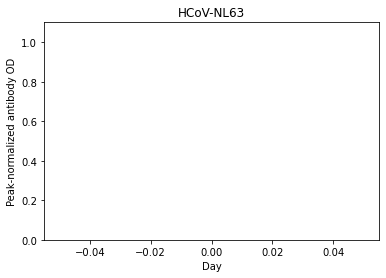

In [321]:
from matplotlib import pyplot as plt
plt.plot(x229eantibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
#plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('HCoV-NL63')
plt.show()

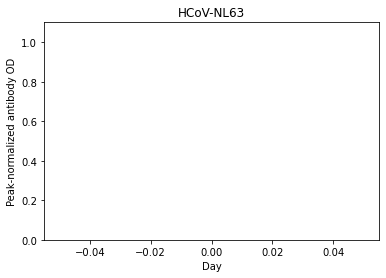

In [322]:
import matplotlib.pyplot as plt
import math

f = plt.figure()
plt.plot(x229eantibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
#plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('HCoV-NL63')
plt.show()

f.savefig("HCoV-NL63_AntibodyTimecourse" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [323]:
x229elsfunc = 0
baseline = 0.1
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(x229eantibodytimecourse))):
    print(x229eantibodytimecourse[index])
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.005
    
    ##Added 11/28
    nl63lsfunc = (x229eantibodytimecourse[index]) - math.pow((calculatelambda(baseline, lambdaValue, index)), 2)     
    print(x229elsfunc)
    
    if x229elsfunc < currentMinValue:
        currentMinValue = x229elsfunc    

1.0
0
nan
0


In [324]:
print(currentMinValue)

0


In [325]:
x229ehalflife  = np.log(2) / 0.09994762543639751

In [326]:
print(x229ehalflife)

6.935104036073725


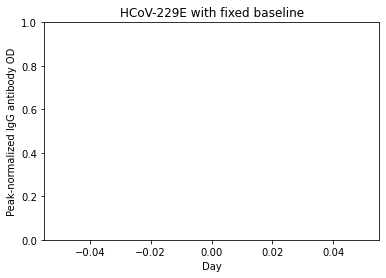

In [327]:
plt.plot(x229eantibodytimecourse, color='red')
plt.ylim(0,1.0)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('HCoV-229E with fixed baseline')
plt.show()

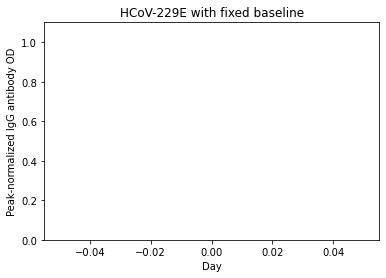

In [328]:
f2 = plt.figure()
plt.plot(x229eantibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('HCoV-229E with fixed baseline')
plt.show()

f2.savefig("HCoV-229E_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [329]:
lambdaForPlot = 0.00231669
baseline = 0.249782
result = 0
plotBaseLines = list()

for days in range(0, 1675):
    exponentValue = -lambdaForPlot * days
    result = baseline + (1 - baseline) * math.exp(exponentValue)
    plotBaseLines.append(result)

print(plotBaseLines)

[1.0, 0.9982639891375209, 0.9965319954190115, 0.9948040095487662, 0.9930800222525902, 0.9913600242777485, 0.9896440063929177, 0.9879319593881355, 0.9862238740747515, 0.9845197412853779, 0.9828195518738405, 0.9811232967151293, 0.9794309667053493, 0.977742552761673, 0.9760580458222892, 0.9743774368463571, 0.9727007168139556, 0.9710278767260365, 0.9693589076043749, 0.9676938004915221, 0.9660325464507562, 0.964375136566036, 0.9627215619419511, 0.961071813703676, 0.9594258829969211, 0.9577837609878856, 0.9561454388632107, 0.9545109078299316, 0.9528801591154301, 0.9512531839673886, 0.9496299736537419, 0.9480105194626309, 0.946394812702356, 0.9447828447013304, 0.9431746068080333, 0.9415700903909632, 0.9399692868385927, 0.9383721875593207, 0.9367787839814281, 0.9351890675530299, 0.933603029742031, 0.9320206620360791, 0.9304419559425199, 0.9288669029883507, 0.9272954947201761, 0.9257277227041616, 0.9241635785259885, 0.922603053790809, 0.9210461401232011, 0.9194928291671236, 0.917943112585871, 0

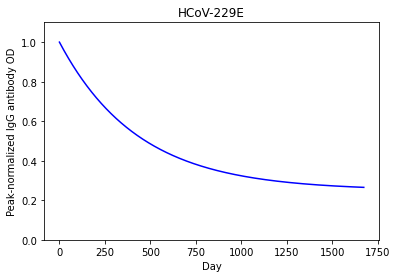

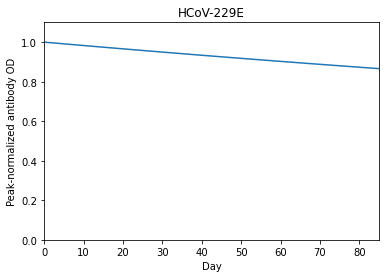

In [330]:
from matplotlib import pyplot as plt

plt.plot(x229eantibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")

plt.plot(plotBaseLines, color = 'blue')

plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('HCoV-NL63 with fixed baseline')
#plt.show()

plt.title('HCoV-229E')
plt.show()

f2 = plt.figure()
plt.plot(plotBaseLines)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('HCoV-229E')
plt.show()

f2.savefig("HCoV-229E_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [331]:
from datetime import datetime

df3 = pd.DataFrame(x229eantibodytimecourse, columns=["Antibody Time Course"])
df3.to_csv('HCoV-229E-Antibody-Time-Course' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv', index=False)

In [332]:
len(x229eantibodytimecourse)

2

In [333]:
import math

def calculatelambda(sarscov1baseline, lambdaValue, index):
    exponentValue = -lambdaValue * index
    result = sarscov1baseline + (1 - sarscov1baseline) * math.exp(exponentValue)
    return result

In [334]:
x229elsfunc = 0
baseline = 0.0999476
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(x229eantibodytimecourse))):
    print(x229eantibodytimecourse[index])
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.00631483
    
    ##Added 11/28
    x229elsfunc = (x229eantibodytimecourse[index]) - math.pow((calculatelambda(baseline, lambdaValue, index)), 2)     
    print(x229elsfunc)
    
    if x229elsfunc < currentMinValue:
        currentMinValue = x229elsfunc      

1.0
0.0
nan
nan


In [335]:
print(currentMinValue)

0.0


In [336]:
x229ehalflife = np.log(2) / 0.006314829758653257

In [337]:
print(x229ehalflife)

109.76498291345396


##### Added as part of python code

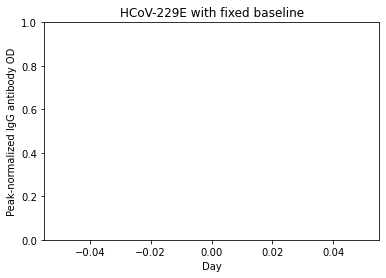

In [338]:
plt.plot(x229eantibodytimecourse, color='red')
plt.ylim(0,1.0)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('HCoV-229E with fixed baseline')
plt.show()

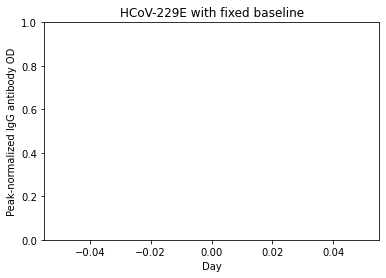

In [339]:
plt.plot(x229eantibodytimecourse, color='red')
plt.ylim(0,1.0)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('HCoV-229E with fixed baseline')
plt.show()

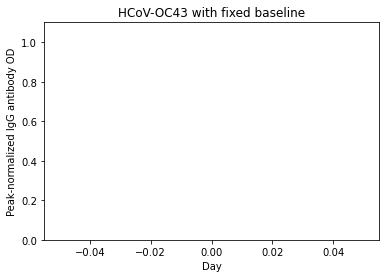

In [340]:
f2 = plt.figure()
plt.plot(x229eantibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('HCoV-OC43 with fixed baseline')
plt.show()

f2.savefig("HCoV-229E_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [341]:
lambdaForPlot = 0.00631483
baseline = 0.0999476
result = 0
plotBaseLines = list()

for days in range(0, len(x229eantibodytimecourse)):
    exponentValue = -lambdaForPlot * days
    result = baseline + (1 - baseline) * math.exp(exponentValue)
    plotBaseLines.append(result)

In [342]:
print(plotBaseLines)

[1.0, 0.994334230117571]


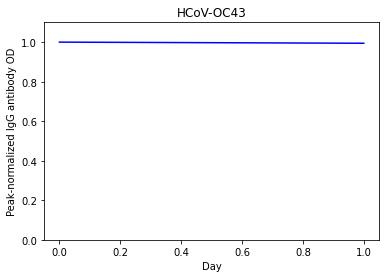

In [343]:
from matplotlib import pyplot as plt

plt.plot(x229eantibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")

plt.plot(plotBaseLines, color = 'blue')

plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('HCoV-OC43 with fixed baseline')
#plt.show()

plt.title('HCoV-OC43')
plt.show()

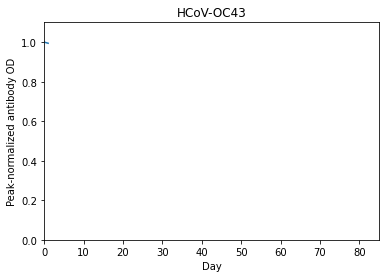

In [344]:
f2 = plt.figure()
plt.plot(plotBaseLines)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('HCoV-OC43')
plt.show()

f2.savefig("HCoV-OC43_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [345]:
len(x229eantibodytimecourse)

2

In [346]:
x229eantibodytimecourseplusexp = x229eantibodytimecourse
day = len(x229eantibodytimecourse)

print(day)

2


In [347]:
#while day < 4393 - Length[oc43antibodytimecourse]:
#Small file 86 records
#while day < 89:
maxDays = 2
while day < maxDays:
    day = day + 1
    print("day : " + str(day))
    exponentValueBaseLine = -0.006314829758653257
    tempValue = 0.09995743181844773 + (x229eantibodytimecourseplusexp[day-1] - 0.09994762543639751) * math.exp(exponentValueBaseLine)
    print('tempValue' + str(tempValue))
    x229eantibodytimecourseplusexp.append(tempValue)

In [348]:
print(x229eantibodytimecourseplusexp)

[1.0, nan]


Text(0.5, 1.0, 'HCoV-229E')

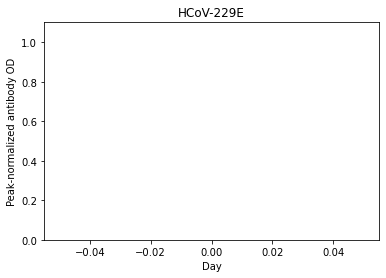

In [349]:
import matplotlib.pyplot as plt2
plt2.plot(x229eantibodytimecourseplusexp)
plt2.ylim(0,1.1)
plt2.xlabel("Day")
plt2.ylabel("Peak-normalized antibody OD")
plt2.title('HCoV-229E')

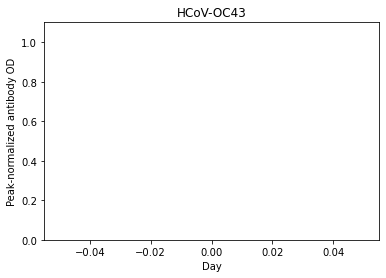

In [350]:
import matplotlib.pyplot as plt3

f = plt3.figure()
plt3.plot(x229eantibodytimecourseplusexp)

plt3.ylim(0,1.1)
plt3.xlabel("Day")
plt3.ylabel("Peak-normalized antibody OD")
plt3.title('HCoV-OC43')
plt3.show()

f.savefig("HCoV-229E_nOD-by-Day_" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [351]:
lengthabtc = len(x229eantibodytimecourse)
print(lengthabtc)

2


##### x229e Probability of No Reinfection Time Course

####### x229eprobinfgivenaod yet to update

In [352]:
import math

def x229eprobinfgivenaod(aod):
    exponentValue = 5.248568 + (9.749887 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [353]:
x229eprobnoreinfectiontimecourse = list()
day = 0
x229eprobnoreinfectiontimecourse.append(1.0)

x229eprobnoreinfectiontimecourse.append(x229eprobnoreinfectiontimecourse[day] * (1-x229eprobinfgivenaod(x229eantibodytimecourse[day])))

In [354]:
print(x229eprobnoreinfectiontimecourse)

[1.0, 0.999999693624789]


In [355]:
#### Need to change days to 4393
while day < 1:
    
    if(day < lengthabtc):
        x229eprobnoreinfectiontimecourse.append(x229eprobnoreinfectiontimecourse[day] * (1 - x229eprobinfgivenaod(x229eantibodytimecourse[day + 1])))
    else:
        x229eprobnoreinfectiontimecourse.append(x229eprobnoreinfectiontimecourse[day] * (1 - x229eprobinfgivenaod(x229eantibodytimecourse[1392])))
            
    day = day + 1   

In [356]:
print(x229eprobnoreinfectiontimecourse)

[1.0, 0.999999693624789, nan]


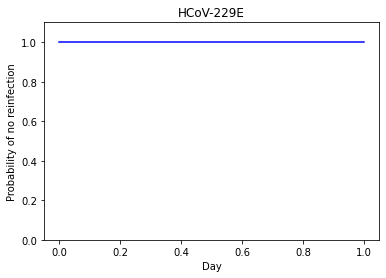

In [357]:
plt.plot(x229eprobnoreinfectiontimecourse, color='blue')
plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Probability of no reinfection")
plt.title('HCoV-229E')
plt.show()

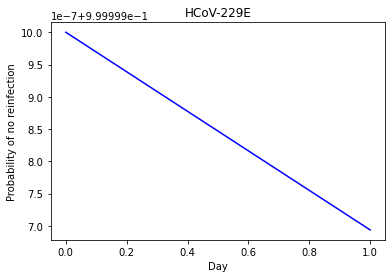

In [358]:
import matplotlib.pyplot as plt6

f6 = plt6.figure()
plt6.plot(x229eprobnoreinfectiontimecourse, color = 'blue')

#plt6.ylim(0,0.007)
#plt6.xlim(0.0, 1.0)

plt6.xlabel("Day")
plt6.ylabel("Probability of no reinfection")
plt6.title('HCoV-229E')
plt6.show()

f6.savefig("HCoV-229E_PnorInfTimecourse-by-Day" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [359]:
x229eprobreinfection = list()

day = 0

#while day < 4393:
while day < 2:
    day = day + 1  
        
    #if day < 1392:
    if day < 2:
        tempValue = x229eprobinfgivenaod(x229eantibodytimecourse[day]) * x229eantibodytimecourse[day]
    else:
        #tempValue = oc43probinfgivenaod(oc43antibodytimecourse[lengthabtc])* oc43probnoreinfectiontimecourse[day]
        tempValue = x229eprobinfgivenaod(x229eantibodytimecourse[1])* x229eantibodytimecourse[1]
    
    x229eprobreinfection.append(tempValue)      

Text(0.5, 1.0, 'HCoV-229E')

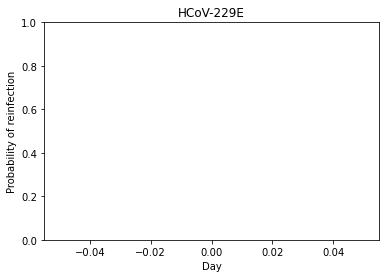

In [360]:
import matplotlib.pyplot as plt7
plt7.plot(oc43probreinfection)
plt7.ylim(0, 1.0)
plt7.xlabel("Day")
plt7.ylabel("Probability of reinfection")
plt7.title('HCoV-229E') 

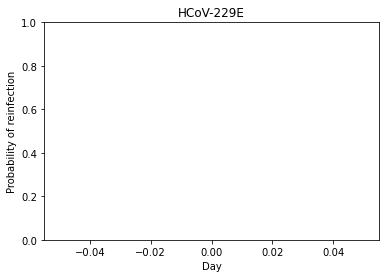

In [361]:
import matplotlib.pyplot as plt7

f = plt7.figure()

plt7.plot(oc43probreinfection)
plt7.ylim(0, 1.0)
plt7.xlabel("Day")
plt7.ylabel("Probability of reinfection")
plt7.title('HCoV-229E') 
f.savefig("HCoV-229E_PrInf-by-Day" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [362]:
sarscov1data = [[1, 90, "SARSCoV1", 0.95351472, True, "NA", "NA"], 
                [2, 180, "SARSCoV1", 0.88161949, False, (180 - 90), ((0.88161949 - 0.95351472) / 0.95351472) / (180 - 90)],
                [3, 360, "SARSCoV1", 0.71702398, False, (360 - 180), ((0.71702398- 0.88161949) / 0.95351472) / (360 - 180)],
                [4, 540, "SARSCoV1", 0.56000208, False, (540 - 360),  ((0.56000208 - 0.71702398) / 0.95351472) / (540 - 360)],
                [5, 720, "SARSCoV1", 0.51459265, False, (720 - 540),  ((0.51459265 - 0.56000208) / 0.95351472) / (720 - 540)]]

######## SARS-CoV-1 Waning of Antibody OD

In [363]:
sarscov1datalength = len(sarscov1data)

In [364]:
print(sarscov1datalength)

5


In [365]:
for i in range(0,len(sarscov1data)):
    for j in range(0,len(sarscov1data[i])):
        print(sarscov1data[i][j])

1
90
SARSCoV1
0.95351472
True
NA
NA
2
180
SARSCoV1
0.88161949
False
90
-0.0008377803426976878
3
360
SARSCoV1
0.71702398
False
180
-0.0009589988290899166
4
540
SARSCoV1
0.56000208
False
180
-0.00091487196850919
5
720
SARSCoV1
0.51459265
False
180
-0.00026457337870055213


In [366]:
aod = 0.525
sarscov1paddedmeanwaning = dict();
sarscov1datalength = 4
index = 0

while aod <= 0.95:        
    index  = 2
    valueList = list()    
    
    while index <= sarscov1datalength:    
        print("aod :" + str(aod))
        if ( (sarscov1data[index-2][3] >= aod and aod >= sarscov1data[index-1][3]) or 
             (sarscov1data[index-2][3] <= aod and aod <= sarscov1data[index-1][3]) ) :
            valueList.append(sarscov1data[index-1][6])
        #else:
         #   valueList.append("None")
        if (len(valueList) != 0 ):
            sarscov1paddedmeanwaning["{0:.3f}".format(aod)] = valueList            
        index = index + 1    
    aod = aod + 0.025

print(len(sarscov1paddedmeanwaning))

aod :0.525
aod :0.525
aod :0.525
aod :0.55
aod :0.55
aod :0.55
aod :0.5750000000000001
aod :0.5750000000000001
aod :0.5750000000000001
aod :0.6000000000000001
aod :0.6000000000000001
aod :0.6000000000000001
aod :0.6250000000000001
aod :0.6250000000000001
aod :0.6250000000000001
aod :0.6500000000000001
aod :0.6500000000000001
aod :0.6500000000000001
aod :0.6750000000000002
aod :0.6750000000000002
aod :0.6750000000000002
aod :0.7000000000000002
aod :0.7000000000000002
aod :0.7000000000000002
aod :0.7250000000000002
aod :0.7250000000000002
aod :0.7250000000000002
aod :0.7500000000000002
aod :0.7500000000000002
aod :0.7500000000000002
aod :0.7750000000000002
aod :0.7750000000000002
aod :0.7750000000000002
aod :0.8000000000000003
aod :0.8000000000000003
aod :0.8000000000000003
aod :0.8250000000000003
aod :0.8250000000000003
aod :0.8250000000000003
aod :0.8500000000000003
aod :0.8500000000000003
aod :0.8500000000000003
aod :0.8750000000000003
aod :0.8750000000000003
aod :0.8750000000000003
a

In [367]:
sarscov1meanwaning = sarscov1paddedmeanwaning

In [368]:
for key in sarscov1paddedmeanwaning:
    print(str(key) + " " + str(sarscov1paddedmeanwaning[key]))

0.575 [-0.00091487196850919]
0.600 [-0.00091487196850919]
0.625 [-0.00091487196850919]
0.650 [-0.00091487196850919]
0.675 [-0.00091487196850919]
0.700 [-0.00091487196850919]
0.725 [-0.0009589988290899166]
0.750 [-0.0009589988290899166]
0.775 [-0.0009589988290899166]
0.800 [-0.0009589988290899166]
0.825 [-0.0009589988290899166]
0.850 [-0.0009589988290899166]
0.875 [-0.0009589988290899166]
0.900 [-0.0008377803426976878]
0.925 [-0.0008377803426976878]


In [369]:
import numpy as np

aod2List = list(sarscov1paddedmeanwaning.keys())
aod2List

arraod2 = np.array(aod2List)
arraod2 = arraod2.astype(float)

In [370]:
covdata2List = list(sarscov1paddedmeanwaning.values())
covdata2List

arrcov2 = np.array(covdata2List).squeeze()

In [371]:
from scipy.interpolate import interp1d
print(len(aod2List))
print(len(covdata2List))

y_interpolation = interp1d(arraod2, arrcov2)

15
15


In [372]:
sarscov1antibodytimecourse = list()

sarscov1antibodytimecourse.append(0.95)

In [373]:
print(sarscov1antibodytimecourse)

[0.95]


In [374]:
day = 0

#while ( day <= (len(sarscov1antibodytimecourse) - 1)  and sarscov1antibodytimecourse[day] >= 0.525):
while ( sarscov1antibodytimecourse[day] <= 0.525):
    print(day)
    print("sarscov1antibodytimecourse[day] : " + str(sarscov1antibodytimecourse[day]))
    print("sarscov1paddedmeanwaning : " + str(sarscov1paddedmeanwaning))
    print("inerpolate of sarscov1paddedmeanwaning")
    #print(y_interpolation(sarscov1antibodytimecourse[day]))
    print("Added value")
    #sarscov1antibodytimecourse.append(sarscov1antibodytimecourse[day] + y_interpolation(sarscov1antibodytimecourse[day]))  
    sarscov1antibodytimecourse.append(sarscov1antibodytimecourse[day] + 0)
    day = day + 1

In [375]:
print(sarscov1antibodytimecourse)

[0.95]


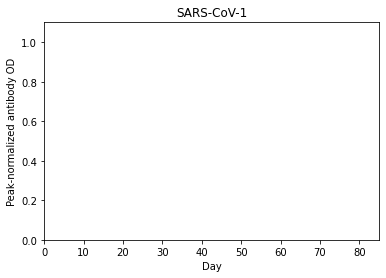

In [376]:
from matplotlib import pyplot as plt
plt.plot(sarscov1antibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

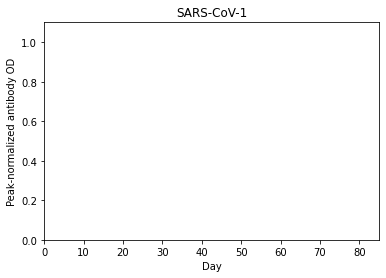

In [377]:
import matplotlib.pyplot as plt
import math
from datetime import datetime

f = plt.figure()
plt.plot(sarscov1antibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

f.savefig("SARS-CoV-1_AntibodyTimecourse" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

###### Export to Excel

In [378]:
from datetime import datetime
import pandas as pd

df3 = pd.DataFrame(sarscov1antibodytimecourse, columns=["Antibody Time Course"])
df3.to_csv('SARS-CoV-1-Antibody-Time-Course' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv', index=False)

In [379]:
sarscov1baseline = 0.1301183

In [380]:
print(sarscov1baseline)

0.1301183


####### This baseline peak-normalized N IgG antibody level for SARS-CoV-1 comes from the ancestral and descendent 
####### states analysis that used the baselines for the human "seasonal" coronaviruses to estimate the baselines 
####### for the zoonotic coronaviruses.

In [381]:
import math

def calculatelambda(sarscov1baseline, lambdaValue, index):
    exponentValue = -lambdaValue * index
    result = sarscov1baseline + (1 - sarscov1baseline) * math.exp(exponentValue)
    return result

In [382]:
sarscov1lsfuncwfixedbaseline = 0
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(sarscov1antibodytimecourse))):
    print(sarscov1antibodytimecourse[index] )
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.002
    
    ##Added 11/28
    sarscov1lsfuncwfixedbaseline = (sarscov1antibodytimecourse[index]) - math.pow((calculatelambda(sarscov1baseline, lambdaValue, index)), 2)     
    print(sarscov1lsfuncwfixedbaseline)
    
    if sarscov1lsfuncwfixedbaseline < currentMinValue:
        currentMinValue = sarscov1lsfuncwfixedbaseline      

0.95
-0.050000000000000044


In [383]:
print(currentMinValue)

-0.050000000000000044


In [384]:
sarscov1halflife = np.log(2) / 0.0015071475711347397 

In [385]:
print(sarscov1halflife)

459.90664340723515


##### Added as part of python code

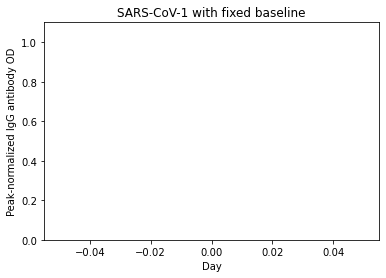

In [386]:
plt.plot(sarscov1antibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('SARS-CoV-1 with fixed baseline')
plt.show()

##### Added as part of python code

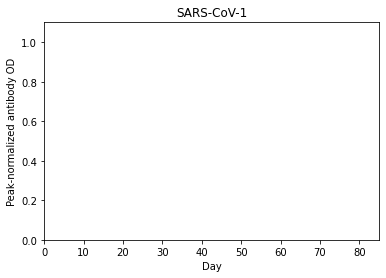

In [387]:
f2 = plt.figure()
plt.plot(sarscov1antibodytimecourse)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

f2.savefig("SARS-CoV-1_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [388]:
lambdaForPlot = 0.00150715
result = 0
plotBaseLines = list()

for days in range(0, len(sarscov1antibodytimecourse)):
    exponentValue = -lambdaForPlot * days
    result = sarscov1baseline + (1 - sarscov1baseline) * math.exp(exponentValue)
    plotBaseLines.append(result)

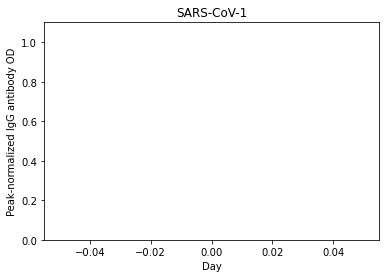

In [389]:
from matplotlib import pyplot as plt

plt.plot(sarscov1antibodytimecourse, color='red')
plt.ylim(0,1.1)
plt.xlabel("Day")

plt.plot(plotBaseLines, color = 'blue')

plt.ylabel("Peak-normalized IgG antibody OD")
plt.title('SARS-CoV-1 with fixed baseline')

plt.title('SARS-CoV-1')
plt.show()

##### Added as part of python code

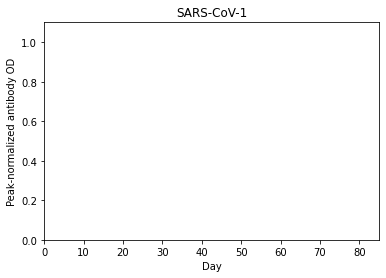

In [390]:
f2 = plt.figure()
plt.plot(plotBaseLines)
plt.ylim(0,1.1)
#####Added x limit
plt.xlim(0,85)
plt.xlabel("Day")
plt.ylabel("Peak-normalized antibody OD")
plt.title('SARS-CoV-1')
plt.show()

f2.savefig("SARS-CoV-1_withFixedBaseline" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [391]:
print(len(sarscov1antibodytimecourse))

1


In [392]:
sarscov1antibodytimecourseplusexp = sarscov1antibodytimecourse
day = len(sarscov1antibodytimecourse)

print(day)

1


In [393]:
print(len(sarscov1antibodytimecourseplusexp))

1


In [394]:
#while day < 4393:
#Small file 86 records
#while day < 89:
maxDays = 2
while day < maxDays:
    day = day + 1
    print("day : " + str(day))
    exponentValueBaseLine = -0.0017578418303445613
    tempValue = sarscov1baseline + (sarscov1antibodytimecourseplusexp[day-1] - sarscov1baseline) * math.exp(exponentValueBaseLine)
    print('tempValue' + str(tempValue))
    sarscov1antibodytimecourseplusexp.append(tempValue)

day : 2


IndexError: list index out of range

In [395]:
print(len(sarscov1antibodytimecourseplusexp))

1


Text(0.5, 1.0, 'SARS-CoV-1')

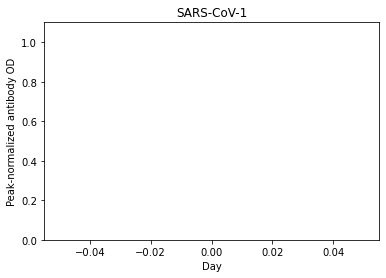

In [396]:
import matplotlib.pyplot as plt2
plt2.plot(sarscov1antibodytimecourseplusexp)
plt2.ylim(0,1.1)
plt2.xlabel("Day")
plt2.ylabel("Peak-normalized antibody OD")
plt2.title('SARS-CoV-1')

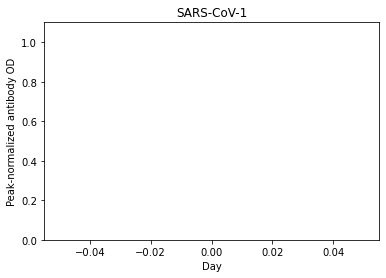

In [397]:
import matplotlib.pyplot as plt3

f = plt3.figure()
plt3.plot(sarscov1antibodytimecourseplusexp)

plt3.ylim(0,1.1)
plt3.xlabel("Day")
plt3.ylabel("Peak-normalized antibody OD")
plt3.title('SARS-CoV-1')
plt3.show()

f.savefig("SARS-CoV-1_nOD-by-Day_" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [398]:
import math

def sarscov1probinfgivenaod(aod):
    exponentValue = 5.248568 + (9.749887 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [399]:
sarscov1probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    sarscov1probinfgivenaodList.append(sarscov1probinfgivenaod(currentValue))

print(sarscov1probinfgivenaodList)

[0.004920048036205034, 0.0046305349546705765, 0.004357983240388405, 0.004101407725307196, 0.0038598794876948807, 0.0036325227527267234, 0.0034185119509150172, 0.0032170689278776783, 0.003027460299016794, 0.002848994942780972, 0.002681021626311956, 0.00252292675742194, 0.002374132257009232, 0.0022340935461931384, 0.002102297642631026, 0.0019782613606689724, 0.001861529610170043, 0.0017516737890590514, 0.0016482902648181487, 0.0015509989403623963, 0.0014594418999173602, 0.001373282130710893, 0.001292202316477827, 0.0012159036989585926, 0.0011441050037504432, 0.0010765414270424323, 0.0010129636799324309, 0.000953137087185962, 0.0008968407374523602, 0.0008438666821036925, 0.0007940191800058812, 0.000747113985669658, 0.0007029776783613526, 0.0006614470298801432, 0.0006223684088294021, 0.0005855972193253069, 0.0005509973721959806, 0.0005184407868294042, 0.000487806921928195, 0.00045898233352434874, 0.0004318602586973432, 0.0004063402235247394, 0.0003823276738758374, 0.00035973362773613385, 0

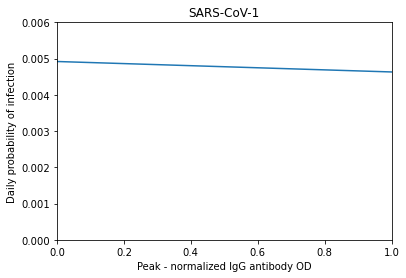

In [400]:
plt.plot(sarscov1probinfgivenaodList)
plt.ylim(0,0.006)
plt.xlim(0.0, 1.0)
plt.xlabel("Peak - normalized IgG antibody OD")
plt.ylabel("Daily probability of infection")
plt.title('SARS-CoV-1')
plt.show()

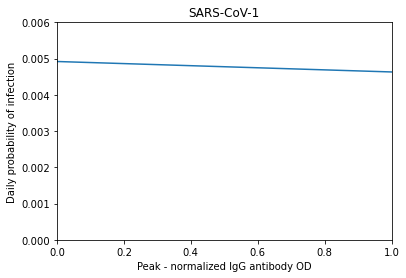

In [401]:
import matplotlib.pyplot as plt4

f2 = plt4.figure()
plt4.plot(sarscov1probinfgivenaodList)

plt4.ylim(0,0.006)
plt4.xlim(0.0, 1.0)
plt4.xlabel("Peak - normalized IgG antibody OD")
plt4.ylabel("Daily probability of infection")
plt4.title('SARS-CoV-1')
plt4.show()

f2.savefig("SARS-CoV-1_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

##### SARS-CoV-1 Probability of Infection | Antibody OD

In [402]:
import math

def sarscov1probinfgivenall(a, b, aod):
    exponentValue = (-a) + (-b) * aod
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [403]:
def populatesarscov1probinfList(a, b):
    sarscov1probinfList = list()
    
    x = 0;

    while( x <= 1):
        x = x + 0.05
        sarscov1probinfList.append(sarscov1probinfgivenall(a, b, x))
    
    return sarscov1probinfList  

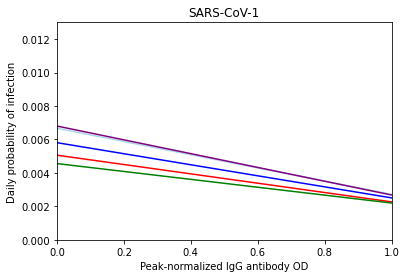

In [404]:
from matplotlib import pyplot as plt

sarscov1probinfList1 = populatesarscov1probinfList(-4.476207, -16.10749)

plt.plot(sarscov1probinfList1, color='red')
plt.ylim(0,0.013)
plt.xlim(0.0, 1.0)
plt.xlabel("Peak-normalized IgG antibody OD")

sarscov1probinfList2 = populatesarscov1probinfList(-4.654767, -14.63486)
sarscov1probinfList3 = populatesarscov1probinfList(-4.102592, -18.02885)
sarscov1probinfList4 = populatesarscov1probinfList(-4.046638, -18.74478)
sarscov1probinfList5 = populatesarscov1probinfList(-4.298427, -16.88932)

plt.plot(sarscov1probinfList2, color = 'green')
plt.plot(sarscov1probinfList3, color = 'lightblue')
plt.plot(sarscov1probinfList4, color = 'purple')
plt.plot(sarscov1probinfList5, color = 'blue')

plt.ylabel("Daily probability of infection")
plt.title('SARS-CoV-1')
#plt.show()

plt.title('SARS-CoV-1')
plt.show()

##### The alternate values for a and b above come from our results using different approaches toward building 
##### the molecular evolutionary tree of the coronaviruses and toward building the time tree of 
##### the coronaviruses (see Supplement).

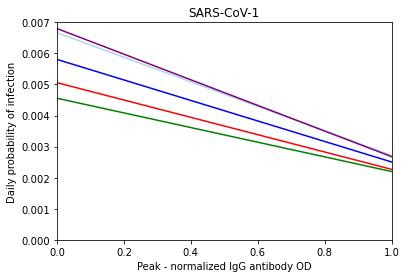

In [405]:
import matplotlib.pyplot as plt5

f5 = plt5.figure()
plt5.plot(sarscov1probinfList1, color='red')
plt5.plot(sarscov1probinfList2, color = 'green')
plt5.plot(sarscov1probinfList3, color = 'lightblue')
plt5.plot(sarscov1probinfList4, color = 'purple')
plt5.plot(sarscov1probinfList5, color = 'blue')

plt5.ylim(0,0.007)
plt5.xlim(0.0, 1.0)

plt5.xlabel("Peak - normalized IgG antibody OD")
plt5.ylabel("Daily probability of infection")
plt5.title('SARS-CoV-1')
plt5.show()

f5.savefig("SARS-CoV-1_PrInfs-by-nOD.pdf", bbox_inches='tight')

##### SARS-CoV-1 Probability of No Reinfection Time Course

In [406]:
sarscov1probnoreinfectiontimecourse = list()
day = 0
sarscov1probnoreinfectiontimecourse.append(1.0)

#Not working
#sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1-sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day+1])))
sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1-sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day])))

In [407]:
print(sarscov1probnoreinfectiontimecourse)

[1.0, 0.9999995011503797]


In [408]:
print(len(sarscov1antibodytimecourse))

1


In [409]:
#### Need to change days to 4393
while day < 1:
    
    if(day < len(sarscov1antibodytimecourse)):
        #sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day + 1])))
        sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[0])))
    else:
        #sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[1392])))
        sarscov1probnoreinfectiontimecourse.append(sarscov1probnoreinfectiontimecourse[day] * (1 - sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[0])))
            
    day = day + 1   

In [410]:
print(sarscov1probnoreinfectiontimecourse)

[1.0, 0.9999995011503797, 0.9999995011503797]


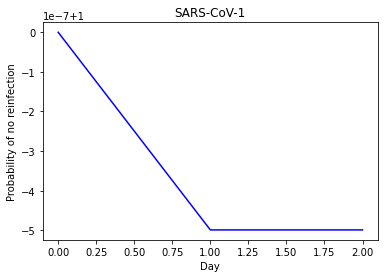

In [411]:
plt.plot(sarscov1probnoreinfectiontimecourse, color='blue')
#Limit not working
#plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Probability of no reinfection")
plt.title('SARS-CoV-1')
plt.show()

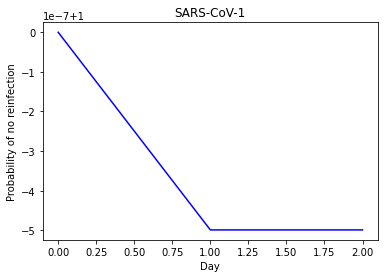

In [412]:
import matplotlib.pyplot as plt6

f6 = plt6.figure()
plt6.plot(sarscov1probnoreinfectiontimecourse, color = 'blue')

#plt6.ylim(0,0.007)
#plt6.xlim(0.0, 1.0)

plt6.xlabel("Day")
plt6.ylabel("Probability of no reinfection")
plt6.title('SARS-CoV-1')
plt6.show()

f6.savefig("SARS-CoV-1_PnorInfTimecourse-by-Day" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [413]:
len(sarscov1antibodytimecourseplusexp)

1

In [414]:
len(sarscov1probnoreinfectiontimecourse)

3

In [415]:
sarscov1probreinfection = list()

day = 0

#while day < 4393:
while day < 1:
    day = day + 1  
        
    #if day < 1392:
    if day < 1:
        tempValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[day]) * sarscov1probnoreinfectiontimecourse[day]
    else:
        tempValue = sarscov1probinfgivenaod(sarscov1antibodytimecourseplusexp[0])* sarscov1probnoreinfectiontimecourse[0]
    
    sarscov1probreinfection.append(tempValue)      

Text(0.5, 1.0, 'SARS-CoV-1')

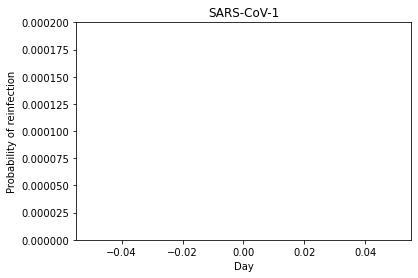

In [416]:
import matplotlib.pyplot as plt7
plt7.plot(sarscov1probreinfection)
plt7.ylim(0, 0.0002)
plt7.xlabel("Day")
plt7.ylabel("Probability of reinfection")
plt7.title('SARS-CoV-1') 

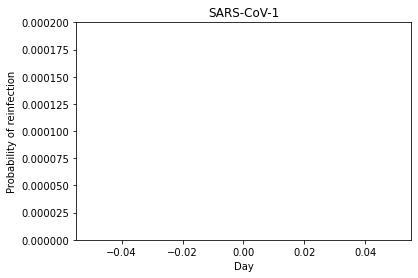

In [417]:
import matplotlib.pyplot as plt7

f = plt7.figure()

plt7.plot(sarscov1probreinfection)
plt7.ylim(0, 0.0002)
plt7.xlabel("Day")
plt7.ylabel("Probability of reinfection")
plt7.title('SARS-CoV-1') 
f.savefig("SARS-CoV-1_PrInf-by-Day" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [418]:
sarscov2data = [[1, 35, "SARSCoV2", 0.3500076/0.3500076, True, "NA", "NA"],
                [2, 48, "SARSCoV2", 0.3397884/0.3500076, False, (48 - 35), (0.3397884 - 0.3500076 / 0.3500076)/(48 - 35)],
                [3, 70, "SARSCoV2", 0.3380852/0.3500076, False, (70 - 48), (0.3380852 - 0.3397884 / 0.3500076)/(70 - 48)], 
                [4, 94, "SARSCoV2", 0.29806/0.3500076, False, (95 - 70), (0.29806 - 0.3380852 / 0.3500076)/(94 - 70)]]        


In [419]:
## SARS-CoV-2 Waning of Antibody OD

sarscov2datalength = len(sarscov2data)

In [420]:
for i in range(0,len(sarscov2data)):
    for j in range(0,len(sarscov2data[i])):
        print(sarscov2data[i][j])

1
35
SARSCoV2
1.0
True
NA
NA
2
48
SARSCoV2
0.9708029197080292
False
13
-0.05078550769230769
3
70
SARSCoV2
0.9659367396593674
False
22
-0.028759896350364966
4
94
SARSCoV2
0.8515815085158152
False
25
-0.027828197485806977


In [421]:
aod = 0.84
sarscov2paddedmeanwaning = dict();
sarscov2datalength = 4
index = 0

while aod <= 1:        
    index  = 2
    valueList = list()    
    
    while index <= sarscov2datalength:    
        print("aod :" + str(aod))
        if ( (sarscov2data[index-2][3] >= aod and aod >= sarscov2data[index-1][3]) or 
             (sarscov2data[index-2][3] <= aod and aod <= sarscov2data[index-1][3]) ) :
            valueList.append(sarscov2data[index-1][6])
        #else:
         #   valueList.append("None")
        if (len(valueList) != 0 ):
            sarscov2paddedmeanwaning["{0:.3f}".format(aod)] = valueList            
        index = index + 1    
    aod = aod + 0.02

print(len(sarscov2paddedmeanwaning))

aod :0.84
aod :0.84
aod :0.84
aod :0.86
aod :0.86
aod :0.86
aod :0.88
aod :0.88
aod :0.88
aod :0.9
aod :0.9
aod :0.9
aod :0.92
aod :0.92
aod :0.92
aod :0.9400000000000001
aod :0.9400000000000001
aod :0.9400000000000001
aod :0.9600000000000001
aod :0.9600000000000001
aod :0.9600000000000001
aod :0.9800000000000001
aod :0.9800000000000001
aod :0.9800000000000001
aod :1.0
aod :1.0
aod :1.0
8


In [422]:
print(sarscov2paddedmeanwaning)

{'0.860': [-0.027828197485806977], '0.880': [-0.027828197485806977], '0.900': [-0.027828197485806977], '0.920': [-0.027828197485806977], '0.940': [-0.027828197485806977], '0.960': [-0.027828197485806977], '0.980': [-0.05078550769230769], '1.000': [-0.05078550769230769]}


In [423]:
for key in sarscov2paddedmeanwaning:
    print(str(key) + " " + str(sarscov2paddedmeanwaning[key]))

0.860 [-0.027828197485806977]
0.880 [-0.027828197485806977]
0.900 [-0.027828197485806977]
0.920 [-0.027828197485806977]
0.940 [-0.027828197485806977]
0.960 [-0.027828197485806977]
0.980 [-0.05078550769230769]
1.000 [-0.05078550769230769]


In [424]:
import numpy as np

aod2List = list(sarscov2paddedmeanwaning.keys())
aod2List

arraod2 = np.array(aod2List)
arraod2 = arraod2.astype(float)

In [425]:
covdata2List = list(sarscov2paddedmeanwaning.values())
covdata2List

arrcov2 = np.array(covdata2List).squeeze()

In [426]:
from scipy.interpolate import interp1d
print(len(aod2List))
print(len(covdata2List))

y_interpolation = interp1d(arraod2, arrcov2)

8
8


In [427]:
sarscov2antibodytimecourse = list()

sarscov2antibodytimecourse.append(1.0)

In [428]:
day = 0

while sarscov2antibodytimecourse[day] >= 0.86:
    print(day)
    print(sarscov2antibodytimecourse[day])
    print(sarscov2antibodytimecourse[day])
    print("sarscov2paddedmeanwaning")
    print(sarscov2paddedmeanwaning)
    print("sarscov2antibodytimecourse[day]")
    print(sarscov2antibodytimecourse[day])
    print("inerpolate of sarscov2paddedmeanwaning")
    print(y_interpolation(sarscov2antibodytimecourse[day]))
    print("Added value")
    test = sarscov2antibodytimecourse[day] + y_interpolation(sarscov2antibodytimecourse[day])
    sarscov2antibodytimecourse.append(sarscov2antibodytimecourse[day] + y_interpolation(sarscov2antibodytimecourse[day]))
    print("sarscov2antibodytimecourse")
    print(sarscov2antibodytimecourse)
    day = day + 1

0
1.0
1.0
sarscov2paddedmeanwaning
{'0.860': [-0.027828197485806977], '0.880': [-0.027828197485806977], '0.900': [-0.027828197485806977], '0.920': [-0.027828197485806977], '0.940': [-0.027828197485806977], '0.960': [-0.027828197485806977], '0.980': [-0.05078550769230769], '1.000': [-0.05078550769230769]}
sarscov2antibodytimecourse[day]
1.0
inerpolate of sarscov2paddedmeanwaning
-0.05078550769230769
Added value
sarscov2antibodytimecourse
[1.0, 0.9492144923076923]
1
0.9492144923076923
0.9492144923076923
sarscov2paddedmeanwaning
{'0.860': [-0.027828197485806977], '0.880': [-0.027828197485806977], '0.900': [-0.027828197485806977], '0.920': [-0.027828197485806977], '0.940': [-0.027828197485806977], '0.960': [-0.027828197485806977], '0.980': [-0.05078550769230769], '1.000': [-0.05078550769230769]}
sarscov2antibodytimecourse[day]
0.9492144923076923
inerpolate of sarscov2paddedmeanwaning
-0.027828197485806977
Added value
sarscov2antibodytimecourse
[1.0, 0.9492144923076923, 0.9213862948218853]


In [429]:
print(sarscov2antibodytimecourse)

[1.0, 0.9492144923076923, 0.9213862948218853, 0.8935580973360783, 0.8657298998502713, 0.8379017023644643]


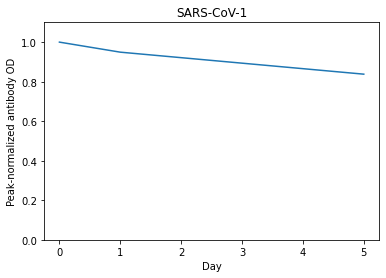

In [430]:
from matplotlib import pyplot as plt8
plt8.plot(sarscov2antibodytimecourse)
plt8.ylim(0,1.1)
plt8.xlabel("Day")
plt8.ylabel("Peak-normalized antibody OD")
plt8.title('SARS-CoV-1')
plt8.show()

In [431]:
df4 = pd.DataFrame(sarscov2antibodytimecourse, columns=["Antibody Time Course"])
df4.to_csv('SARS-CoV-2-Antibody-Time-Course' + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + '.csv', index=False)

In [432]:
sarscov2baseline = 0.1301183

In [433]:
sarscov2lsfuncwfixedbaseline = 0
currentMinValue = float('inf')
currentMinValue

for index in range(0, (len(sarscov2antibodytimecourse))):
    print(sarscov2antibodytimecourse[index] )
    ##Need to find the step value and maximum value for this lambdaValue
    lambdaValue = 0.002
    ##Added 11/28
    sarscov2lsfuncwfixedbaseline = (sarscov2antibodytimecourse[index]) - math.pow((calculatelambda(sarscov2baseline, lambdaValue, index)), 2) 
    print(sarscov2lsfuncwfixedbaseline)
    
    if sarscov2lsfuncwfixedbaseline < currentMinValue:
        currentMinValue = sarscov2lsfuncwfixedbaseline      

1.0
0.0
0.9492144923076923
-0.0473124788307735
0.9213862948218853
-0.07168060993751224
0.8935580973360783
-0.09606165358231744
0.8657298998502713
-0.12045556001656832
0.8379017023644643
-0.14486227968664767


In [434]:
print(currentMinValue)

-0.14486227968664767


In [435]:
sarscov2halflife = np.log(2) / 0.003746311184177791 

In [436]:
print(sarscov2halflife)

185.02125063379415


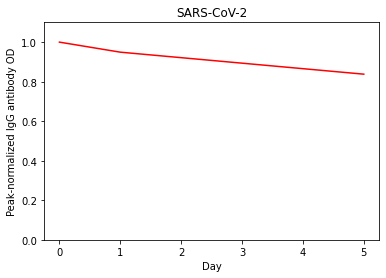

In [437]:
from matplotlib import pyplot as plt9
plt9.plot(sarscov2antibodytimecourse, color='red')
plt9.ylim(0,1.1)
plt9.xlabel("Day")
plt9.ylabel("Peak-normalized IgG antibody OD")
plt9.title('SARS-CoV-2')
plt9.show()

In [438]:
print(len(sarscov2antibodytimecourse))

6


In [439]:
sarscov2antibodytimecourseplusexp = sarscov2antibodytimecourse
day = len(sarscov2antibodytimecourse)

print(day)

6


In [440]:
#while day < 4393:
#Small file 86 records
#while day < 88:
maxDays = 6
while day < maxDays:
    day = day + 1
    print("day")
    print(day)
    exponentValueBaseLine = -0.004661402990405273
    tempValue = sarscov1baseline + (sarscov2antibodytimecourseplusexp[day-1] - sarscov1baseline) * math.exp(exponentValueBaseLine)
    print('tempValue')
    print(tempValue)
    sarscov2antibodytimecourseplusexp.append(tempValue)

In [441]:
print(sarscov2antibodytimecourseplusexp)

[1.0, 0.9492144923076923, 0.9213862948218853, 0.8935580973360783, 0.8657298998502713, 0.8379017023644643]


In [442]:
print(len(sarscov2antibodytimecourseplusexp))

6


Text(0.5, 1.0, 'SARS-CoV-2')

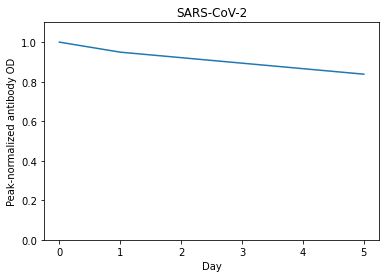

In [443]:
import matplotlib.pyplot as plt2
plt2.plot(sarscov2antibodytimecourseplusexp)
#f = plt2.figure()
plt2.ylim(0,1.1)
plt2.xlabel("Day")
plt2.ylabel("Peak-normalized antibody OD")
plt2.title('SARS-CoV-2')

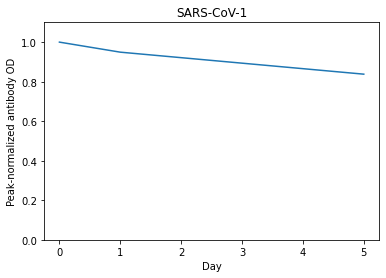

In [444]:
import matplotlib.pyplot as plt10

f = plt10.figure()
plt10.plot(sarscov2antibodytimecourseplusexp)

plt10.ylim(0,1.1)
plt10.xlabel("Day")
plt10.ylabel("Peak-normalized antibody OD")
plt10.title('SARS-CoV-1')
plt10.show()

f.savefig("SARS-CoV-2_nOD-by-Day" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

##### SARS-CoV-2 Probability of Infection | Antibody OD

In [445]:
import math

def sarscov2probinfgivenaod(aod):
    exponentValue = 4.997881 + (11.099285 * aod)
    result = 1 / (1 + math.exp(exponentValue))
    return result

In [446]:
sarscov2probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    sarscov2probinfgivenaodList.append(sarscov2probinfgivenaod(currentValue))

In [447]:
sarscov2probinfgivenaodList = list()

currentValue = 0;

while( currentValue <= 1):
    currentValue = currentValue + 0.00625
    sarscov2probinfgivenaodList.append(sarscov2probinfgivenaod(currentValue))

In [448]:
print(sarscov2probinfgivenaodList)

[0.006260273016612123, 0.005843166808398569, 0.005453698818166833, 0.005090057352396867, 0.0047505469371580625, 0.004433581191362633, 0.004137676093955315, 0.003861443629092698, 0.0036035857931512425, 0.0033628889473563293, 0.0031382184999168964, 0.0029285139017559774, 0.002732783940225708, 0.002550102315567287, 0.0023796034853058264, 0.0022204787622435414, 0.0020719726522206478, 0.0019333794183414856, 0.0018040398589059226, 0.0016833382868355494, 0.0015706996989351114, 0.0014655871238771479, 0.0013674991383379005, 0.0012759675412423227, 0.0011905551765927344, 0.001110853895857513, 0.0010364826513817643, 0.0009670857127499214, 0.0009023309984802114, 0.0008419085158622217, 0.000785528902161321, 0.0007329220608074254, 0.0006838358865605804, 0.0006380350740024998, 0.0005953000040417818, 0.000555425703441567, 0.000518220872682436, 0.0004835069777608483, 0.0004511174017951428, 0.0004208966525675465, 0.0003926996223724976, 0.0003663908967695135, 0.0003418441090534263, 0.000318941337456767, 0

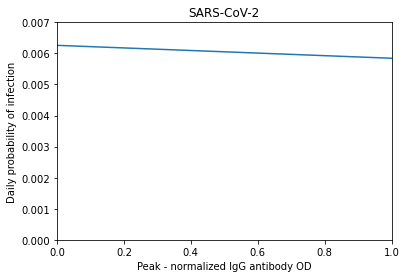

In [449]:
import matplotlib.pyplot as plt11

plt11.plot(sarscov2probinfgivenaodList)
plt11.ylim(0,0.007)
plt11.xlim(0.0, 1.0)
plt11.xlabel("Peak - normalized IgG antibody OD")
plt11.ylabel("Daily probability of infection")
plt11.title('SARS-CoV-2')
plt11.show()

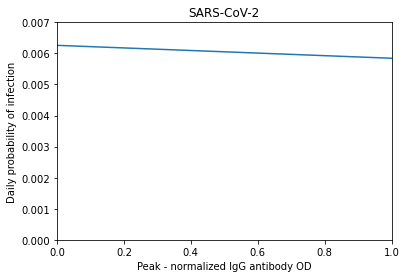

In [450]:
import matplotlib.pyplot as plt12

f12 = plt12.figure()
plt12.plot(sarscov2probinfgivenaodList)

plt12.ylim(0,0.007)
plt12.xlim(0.0, 1.0)
plt12.xlabel("Peak - normalized IgG antibody OD")
plt12.ylabel("Daily probability of infection")
plt12.title('SARS-CoV-2')
plt12.show()

f12.savefig("SARS-CoV-2_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

Text(0.5, 1.0, 'SARS-CoV-2')

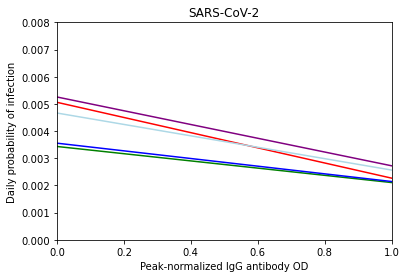

In [451]:
from matplotlib import pyplot as plt13

sarscov2probinfList1 = populatesarscov1probinfList(-4.997881, -11.099285)

plt13.plot(sarscov1probinfList1, color='red')
plt13.ylim(0,0.008)
plt13.xlim(0.0, 1.0)
plt13.xlabel("Peak-normalized IgG antibody OD")

sarscov2probinfList2 = populatesarscov1probinfList(-5.1806, -9.802874)
sarscov2probinfList3 = populatesarscov1probinfList(-4.76283, -12.00514)
sarscov2probinfList4 = populatesarscov1probinfList(-4.5831338, -13.20581)
sarscov2probinfList5 = populatesarscov1probinfList(-5.12873, -10.142186)

plt13.plot(sarscov2probinfList2, color = 'green')
plt13.plot(sarscov2probinfList3, color = 'lightblue')
plt13.plot(sarscov2probinfList4, color = 'purple')
plt13.plot(sarscov2probinfList5, color = 'blue')

plt13.ylabel("Daily probability of infection")
plt13.title('SARS-CoV-2')
#plt.show()

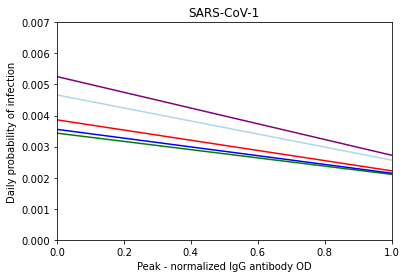

In [452]:
import matplotlib.pyplot as plt14

f14 = plt14.figure()
plt14.plot(sarscov2probinfList1, color='red')
plt14.plot(sarscov2probinfList2, color = 'green')
plt14.plot(sarscov2probinfList3, color = 'lightblue')
plt14.plot(sarscov2probinfList4, color = 'purple')
plt14.plot(sarscov2probinfList5, color = 'blue')

plt14.ylim(0,0.007)
plt14.xlim(0.0, 1.0)

plt14.xlabel("Peak - normalized IgG antibody OD")
plt14.ylabel("Daily probability of infection")
plt14.title('SARS-CoV-1')
plt14.show()

f14.savefig("SARS-CoV-2_PrInfs-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

##### SARS-CoV-2 Probability of No Reinfection Time Course

In [453]:
sarscov2probnoreinfectiontimecourse = list()

day = 0
sarscov2probnoreinfectiontimecourse.append(1.0)

sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1-sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day+1])))

In [454]:
print(sarscov2probnoreinfectiontimecourse)

[1.0, 0.9999998205704806]


In [455]:
#### Need to change days to 4393
while day < 2:
    
    if(day < len(sarscov2antibodytimecourse)):
        sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day + 1])))
    else:
        #sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1392])))
        sarscov2probnoreinfectiontimecourse.append(sarscov2probnoreinfectiontimecourse[day] * (1 - sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1])))
            
    day = day + 1   

In [456]:
print(sarscov2probnoreinfectiontimecourse)

[1.0, 0.9999998205704806, 0.9999998205704806, 0.9999995762073567]


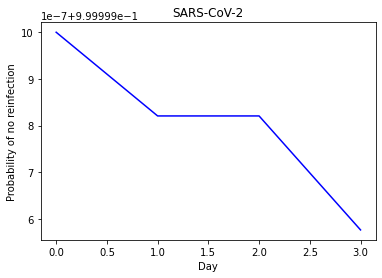

In [457]:
plt.plot(sarscov2probnoreinfectiontimecourse, color='blue')
#Limit not working
#plt.ylim(0,1.1)
plt.xlabel("Day")
plt.ylabel("Probability of no reinfection")
plt.title('SARS-CoV-2')
plt.show()

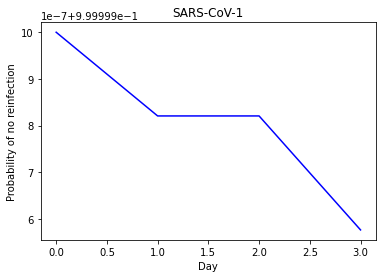

In [458]:
import matplotlib.pyplot as plt15

f15 = plt15.figure()
plt15.plot(sarscov2probnoreinfectiontimecourse, color = 'blue')

#plt6.ylim(0,0.007)
#plt6.xlim(0.0, 1.0)

plt15.xlabel("Day")
plt15.ylabel("Probability of no reinfection")
plt15.title('SARS-CoV-1')
plt15.show()

f15.savefig("SARS-CoV-2_PnorInfTimecourse-by-" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')

In [459]:
sarscov2probreinfection = list()
day = 0;

In [460]:
#while day < 4393:
while day < 85:
    day = day + 1  
        
    #if day < 1392:
    if day < 2:
        tempValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[day]) * sarscov2probnoreinfectiontimecourse[day]
    else:       
        #empValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1392])  * sarscov2probnoreinfectiontimecourse[day]
        tempValue = sarscov2probinfgivenaod(sarscov2antibodytimecourseplusexp[1])  * sarscov2probnoreinfectiontimecourse[1]
    
    sarscov2probreinfection.append(tempValue)      

In [461]:
print(sarscov2probreinfection)

[1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941897e-07, 1.7942948720941

Text(0.5, 1.0, 'SARS-CoV-2')

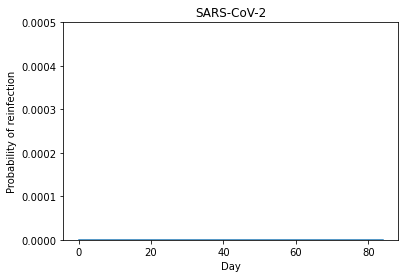

In [462]:
import matplotlib.pyplot as plt17
plt17.plot(sarscov2probreinfection)
plt17.ylim(0, 0.0005)
plt17.xlabel("Day")
plt17.ylabel("Probability of reinfection")
plt17.title('SARS-CoV-2') 

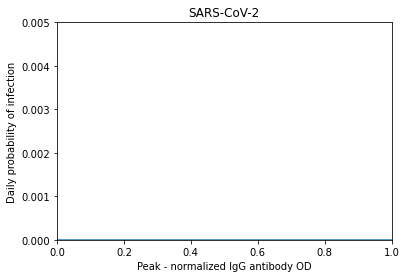

In [463]:
import matplotlib.pyplot as plt17

f17 = plt17.figure()
plt17.plot(sarscov2probreinfection)

plt17.ylim(0,0.005)
plt17.xlim(0.0, 1.0)
plt17.xlabel("Peak - normalized IgG antibody OD")
plt17.ylabel("Daily probability of infection")
plt17.title('SARS-CoV-2')
plt17.show()

f17.savefig("SARS-CoV-2_PrInf-by-nOD" + str(datetime.now().strftime('%Y_%m_%d_%H_%M_%S')) + ".pdf", bbox_inches='tight')